<a href="https://colab.research.google.com/github/DharmendraYadav96/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Bike Sharing Demand Prediction**



##### **Project Type**    - Linear Regression
##### **Contribution**    - Team
##### **Team Member 1 -** Dharmendra Yadav
##### **Team Member 2 -** Pranita Tiwari
##### **Team Member 3 -** Kratika Jawariya



# **Project Summary**

The bike rental count prediction project addresses the pressing challenge of accurately forecasting demand for bike ride-sharing services in urban settings. This initiative combines historical bike usage patterns with weather data to construct predictive models that can provide precise forecasts. The dataset encompasses eight crucial input variables, including date, seasons, holidays, temperature, humidity, and more. To tackle this complex problem, the project employs a suite of Python libraries such as Pandas, Seaborn, NumPy, and scikit-learn.

The project proceeds through a series of meticulously orchestrated steps. First, data wrangling and cleaning are performed to ensure data integrity and consistency. This includes handling missing values, addressing outliers, and preparing the dataset for analysis. Subsequently, an exploratory data analysis (EDA) phase provides critical insights into the dataset's patterns and relationships between variables. Visualizations and statistical analysis aid in understanding the data's nuances.

Feature engineering follows, where new features are created or existing ones are modified to enhance model predictability. This includes encoding categorical data, transforming variables, and preparing datetime features for modeling. To enhance model stability, outliers are identified and removed from the dataset. Data transformation, such as scaling and normalization, ensures variables are on a similar scale and suitable for modeling. Categorical variables are encoded into numerical format, using techniques like one-hot encoding or label encoding, to make them compatible with machine learning models. Scaling techniques, such as Min-Max scaling or Z-score scaling, are applied to ensure that no single feature dominates the modeling process. Multicollinearity, a situation where independent variables are highly correlated, is identified and addressed to ensure model interpretability and stability.

The heart of the project lies in the application of various machine learning algorithms, including linear regression, decision trees, random forests and gradient boosting. Each model is meticulously trained and evaluated using appropriate evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.

The critical juncture arrives when the best-performing model is selected based on its performance metrics. This model, capable of generating precise demand predictions, holds significant implications for the bike ride-sharing industry. It empowers ride-sharing companies to optimize their resource allocation, reduce costs, and enhance customer satisfaction. Moreover, by aligning bike availability with weather conditions, the project promotes eco-friendly transportation choices, mitigating traffic congestion and carbon emissions.

In essence, this project represents the convergence of data science, technology, and urban planning, contributing to the evolution of efficient, sustainable, and customer-centric urban mobility. It underscores the power of data-driven decision-making and innovation in shaping the future of urban transportation.


# **GitHub Link -**

##### Dharmendra - https://github.com/DharmendraYadav96/Bike-Sharing-Demand-Prediction.git
##### Kratika - https://github.com/kratikajawariya28/Bike-Sharing-Demand-Prediction..git

##### Pranita - https://github.com/pranitatiwari29/Regression_bike_sharing_demand_prediction_ML

# **Problem Statement**


Bike rentals have been implemented in numerous urban areas to improve the convenience of urban mobility. Ensuring that rental bikes are readily available and easily accessible to the public is essential for reducing waiting times. Consequently, ensuring a consistent supply of rental bikes to the city becomes a significant priority. The pivotal aspect of achieving this is accurately predicting the required bike count for each hour to maintain a stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [130]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import scipy.stats as stats

# import all libraries related to ML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

### Dataset Loading

In [131]:
# Load Dataset
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [132]:
path = '/content/mydrive/MyDrive/Dataset/SeoulBikeData.csv'
df = pd.read_csv(path, encoding='ISO-8859-1')

### Dataset First View

In [133]:
# Dataset First Look
df.head(10).T

0           1           2           3  \
Date                       01/12/2017  01/12/2017  01/12/2017  01/12/2017   
Rented Bike Count                 254         204         173         107   
Hour                                0           1           2           3   
Temperature(°C)                  -5.2        -5.5        -6.0        -6.2   
Humidity(%)                        37          38          39          40   
Wind speed (m/s)                  2.2         0.8         1.0         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -17.6       -17.6       -17.7       -17.6   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   

                                    4           5           6           7  \
Date                       01/12/2017  01/12/2017  01/12/2017  01/12/2017   
Rented Bike Count                  78         100         181         460   
Hour                                4           5           6           7   
Temperature(°C)                  -6.0        -6.4        -6.6        -7.4   
Humidity(%)                        36          37          35          38   
Wind speed (m/s)                  2.3         1.5         1.3         0.9   
Visibility (10m)                 2000        2000        2000        2000   
Dew point temperature(°C)       -18.6       -18.7       -19.5       -19.3   
Solar Radiation (MJ/m2)           0.0         0.0         0.0         0.0   
Rainfall(mm)                      0.0         0.0         0.0         0.0   
Snowfall (cm)                     0.0         0.0         0.0         0.0   
Seasons                        Winter      Winter      Winter      Winter   
Holiday                    No Holiday  No Holiday  No Holiday  No Holiday   
Functioning Day                   Yes         Yes         Yes         Yes   

                                    8           9  
Date                       01/12/2017  01/12/2017  
Rented Bike Count                 930         490  
Hour                                8           9  
Temperature(°C)                  -7.6        -6.5  
Humidity(%)                        37          27  
Wind speed (m/s)                  1.1         0.5  
Visibility (10m)                 2000        1928  
Dew point temperature(°C)       -19.8       -22.4  
Solar Radiation (MJ/m2)          0.01        0.23  
Rainfall(mm)                      0.0         0.0  
Snowfall (cm)                     0.0         0.0  
Seasons                        Winter      Winter  
Holiday                    No Holiday  No Holiday  
Functioning Day                   Yes         Yes

### Dataset Rows & Columns count

In [134]:
# Dataset Rows & Columns count
df.shape

(8760, 14)

- There are 8760 rows and 14 columns.

### Dataset Information

In [135]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

- There are 4 object type variables which need to be converted to numerical data type for applying machine learning algorithm.

#### Duplicate Values

In [136]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

**There is no duplicate row.**

#### Missing Values/Null Values

In [137]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**There is no missing value.**

### What did you know about your dataset?

- Dependent variable is Rented bike count.
- Number of rows is 8760 and Number of columns is 14.
- No missing values in any column and No duplicated values.
- There are 4 object type variables and other are numerical type variable.

## ***2. Understanding Your Variables***

In [138]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [139]:
# Dataset Describe
df.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

Mean value of visibility is more than than mean value of other numerical features so the data set need to normalised.

### Variables Description

- **Date**: Current date
- **Rented Bike Count**: (Dependent variable), No. of rented bike count.
- **Hour**: Hour of the day in 24hr format.
- **Temperature(°C)**: (Numerical) Temperature at the time of booking in °C.
- **Humidity(%)**: Humidity in (%).
- **Wind speed (m/s)**: (Numerical) Wind speed in (m/s).
- **Visibility (10m)**: (Numerical) visibility in (10m).
- **Dew point temperature (°C)**: (Numerical) dew point temperature in (°C).
- **Solar Radiation (MJ/m2)**: (Numerical) Solar radiation in (MJ/m2).
- **Rainfall(mm)** : (Numerical) Rainfall in (mm).
- **Snowfall (cm)** : (Numerical) Snowfall in (cm).
- **Seasons** : (Categorical) 4 seasons.
- **Holiday** : (Categorical) Yes or No
- **Functioning Day** : (Categorical) Yes or No

### Check Unique Values for each variable.

In [140]:
# Check Unique Values for each variable.
for col in df.columns:
  print(col, ": ", df[col].nunique())
  print(df[col].unique(), "\n")

Date :  365
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018

## 3. ***Data Wrangling***

### 1. Renaming column

In [141]:
df.rename(columns = {'Rented Bike Count' : 'Rented_Bike_Count',
 'Temperature(°C)' : 'Temperature',
 'Humidity(%)' : 'Humidity',
 'Wind speed (m/s)' : 'Wind_speed',
 'Visibility (10m)' : 'Visibility',
 'Dew point temperature(°C)' : 'Dew_point_temperature',
 'Solar Radiation (MJ/m2)' : 'Solar_Radiation',
 'Rainfall(mm)' : 'Rainfall',
 'Snowfall (cm)' : 'Snowfall',
 'Functioning Day' : 'Functioning_Day'}, inplace = True)

df.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day'],
      dtype='object')

### 2. Convert date column data type to date datatype

In [142]:
# Write your code to make your dataset analysis ready.
df['Weekday'] = df['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y').weekday())
df['Month'] = df['Date'].apply(lambda x : datetime.strptime(x, '%d/%m/%Y').month)

In [143]:
# drop the date column
df.drop('Date', axis = 1, inplace = True)

What all manipulations have you done and insights you found?

1. Renaming the columns so that it is easier to use them in our code.
2. Extract the weekday and month from the date column and then drop the date column

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
numerical_features = ['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall']

# seprating categorical features
categorical_features = set(df.columns) - set(numerical_features)
categorical_features

{'Functioning_Day', 'Holiday', 'Hour', 'Month', 'Seasons', 'Weekday'}

#### **Rented Bike count Vs Hour**

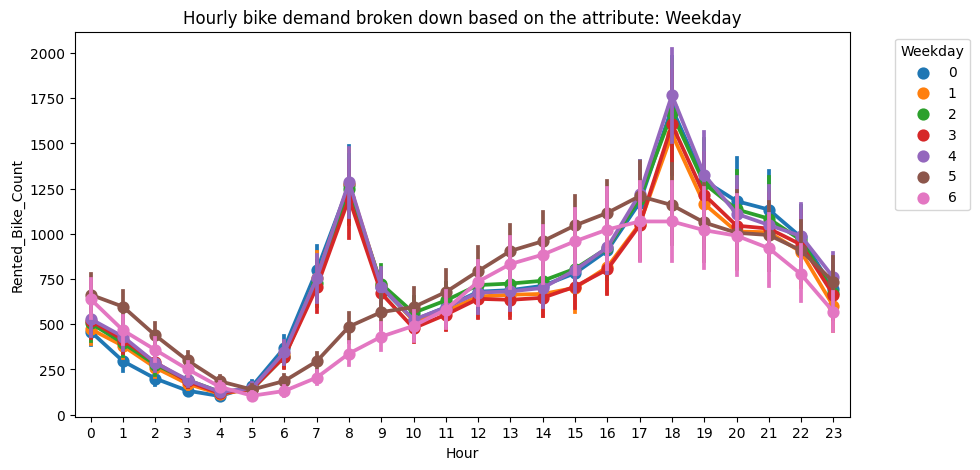

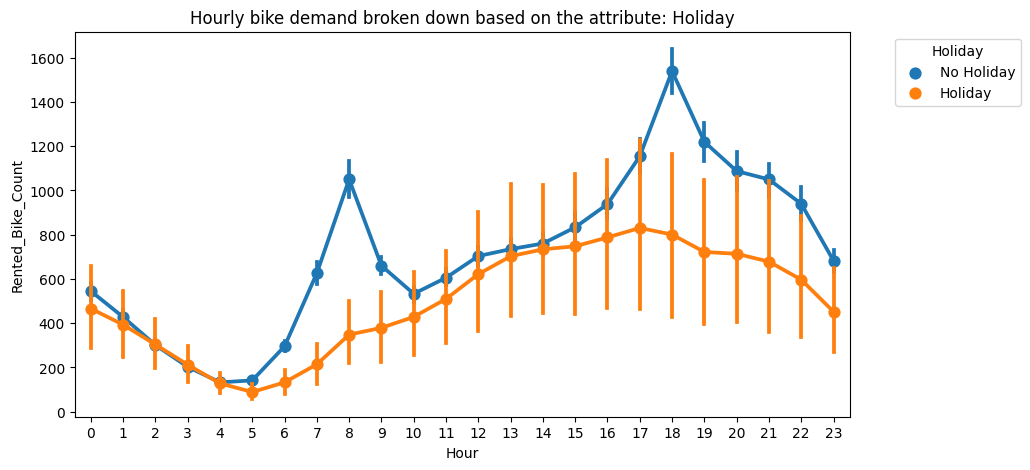

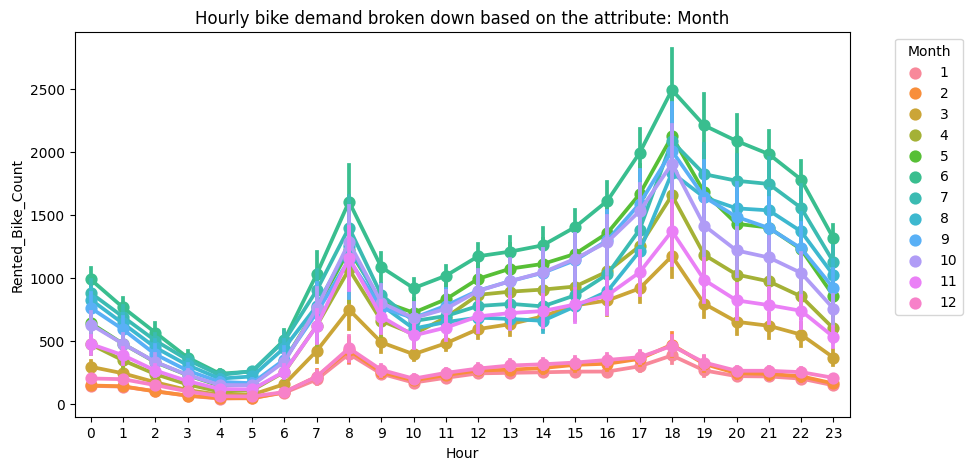

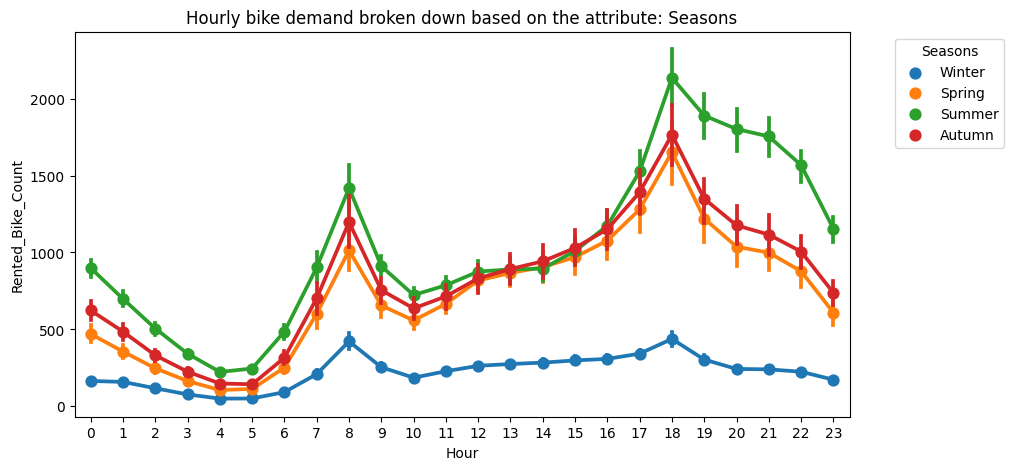

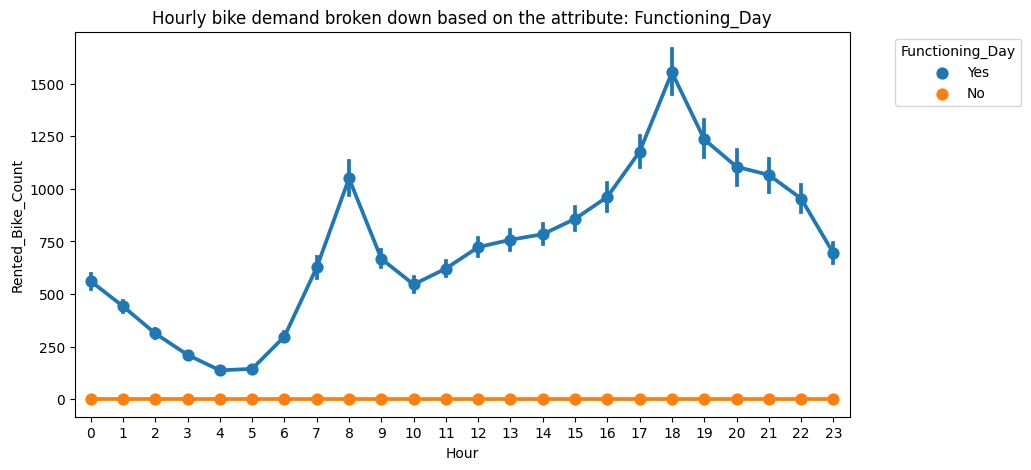

In [ ]:
for i in categorical_features:
  if i == 'Hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df, x='Hour', y='Rented_Bike_Count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show

##### 1. Why did you pick the specific chart?

- This plot has been chosen to examine the number of rented bicycles during each hour of the day across various seasons, months, working days, and holidays.

##### 2. What is/are the insight(s) found from the chart?

  In all the charts, two distinct peaks were observed: one in the morning and another in the evening. These peaks correspond to the increased demand for bicycles during typical office hours.

  **1. Weekday**: Regarding weekdays, there are no peak days during the weekends, which is understandably due to the absence of office-goers.

  **2. Month:** When examining the data by month, a consistent daily trend is observed, but the demand varies between different months. Months 1, 11, and 12 exhibit the lowest demand.

  **3. Holiday**: On holidays, there are no discernible peaks in the data.

  **4. Seasons**: Across the seasons, a consistent trend is observed. Summer experiences the highest demand, while winter sees the lowest demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The insights gained from the data analysis offer opportunities for positive business impact by optimizing resource allocation and understanding seasonal variations. However, the insights also highlight potential challenges during certain months and weekends that businesses need to address to ensure sustained growth and profitability.

### **Categorical features Analysis**

---



In [ ]:
# function to draw barplot and boxplot
def categorical_plot(feat):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    sns.barplot(x = df[feat], y = df['Rented_Bike_Count'], ax =axs[0])
    axs[0].set_title(f'{feat} vs Rented Bike Count')

    sns.boxplot(x = df[feat], y = df['Rented_Bike_Count'], ax = axs[1])
    axs[1].set_title(f'{feat} vs Rented Bike Count')

    plt.show()


#### **Column: Functioning day**

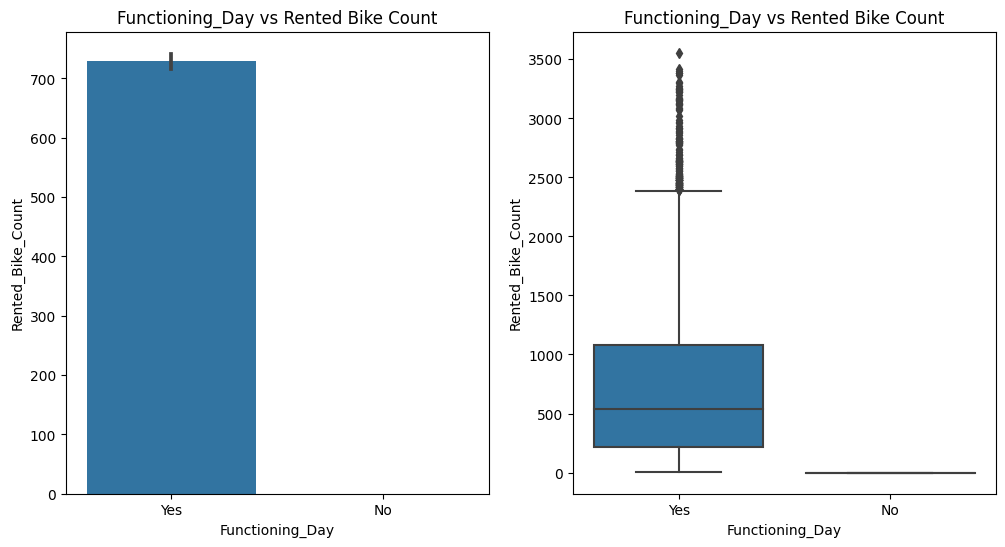

In [ ]:
categorical_plot('Functioning_Day')

In [ ]:
df['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

##### 1. Why did you pick the specific chart?

- This plot is picked to analyse relationship between the functioning day with rented bike count.


##### 2. What is/are the insight(s) found from the chart?

- There are very few Non functioning day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- The Non functioning day can be utilised by company for Maintenance purpose.

#### **Column: Holiday**

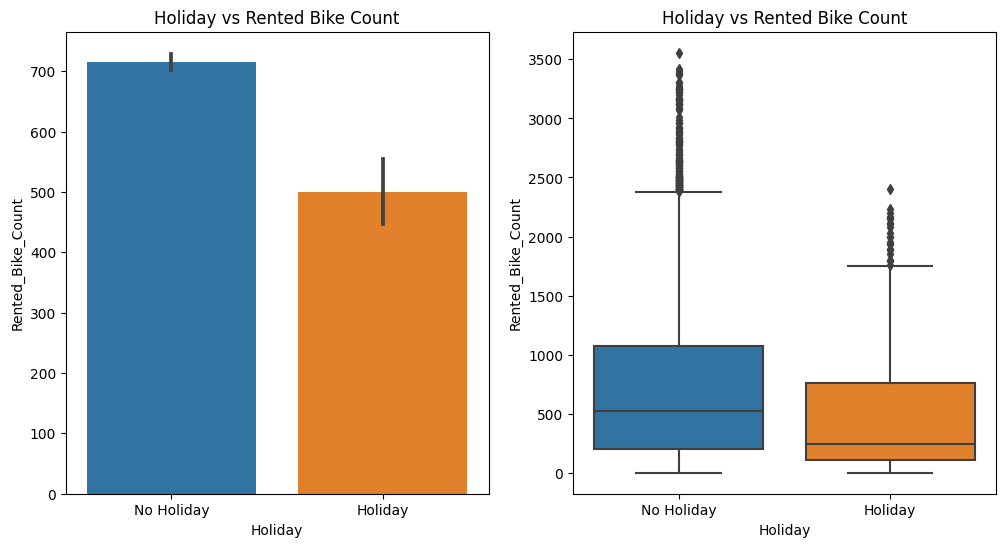

In [ ]:
categorical_plot('Holiday')

##### 1. Why did you pick the specific chart?

- The barplot is pick to compare the rented bike count on holiday and non holiday.

##### 2. What is/are the insight(s) found from the chart?

- There are less rented bike count on holiday.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- This insight proves advantageous for the business since it enables the allocation of resources based on demand.

#### **Column: Month**

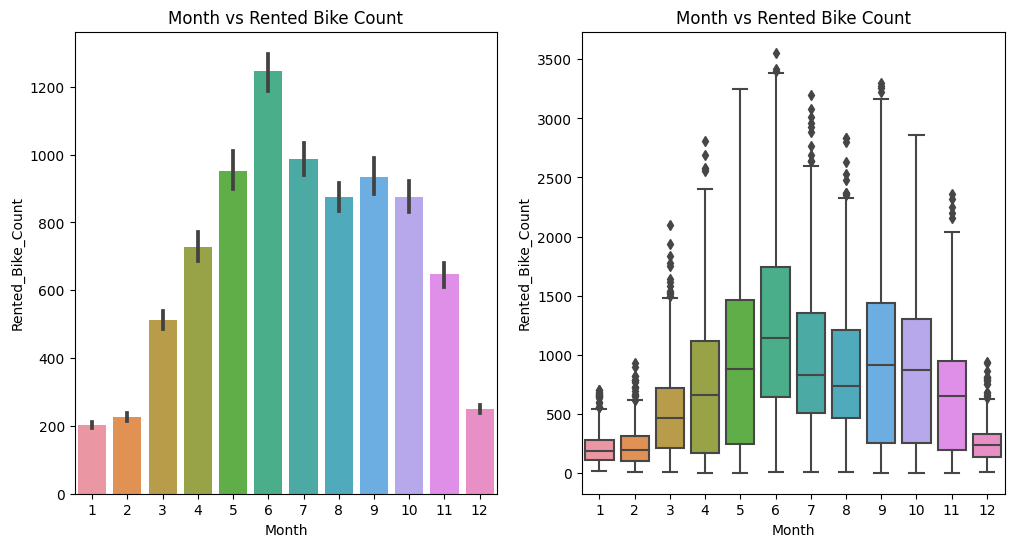

In [ ]:
categorical_plot('Month')

##### 1. Why did you pick the specific chart?

- This plot is picked to compare the count of rented bike in different months.

##### 2. What is/are the insight(s) found from the chart?

- Highest booking: May
- Lowest booking: January

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Pricing strategies, resource allocation, and marketing strategies can be tailored according to the varying demand across different seasons.

#### **Column: Seasons**

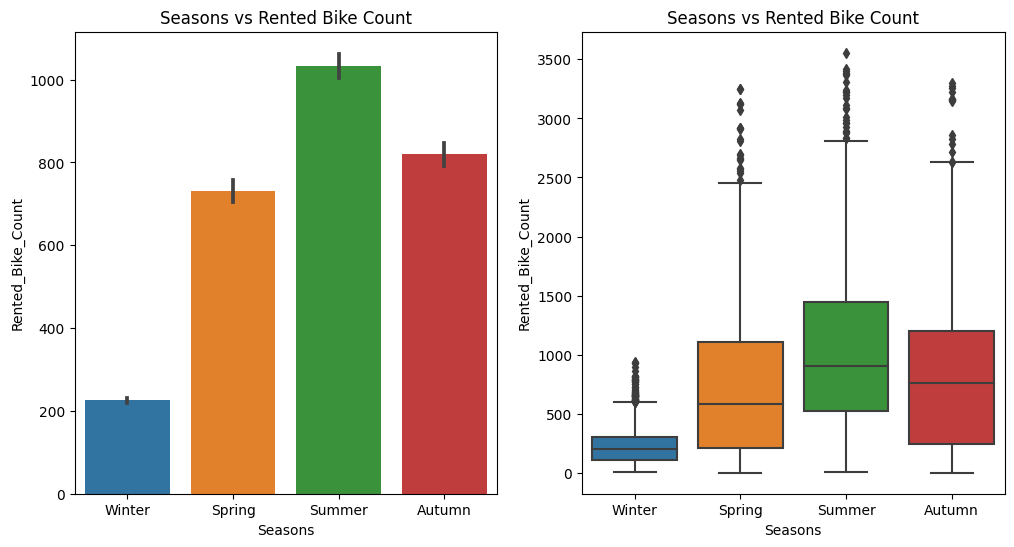

In [ ]:
categorical_plot('Seasons')

##### 1. Why did you pick the specific chart?

- The bar plot is chosen to compare the variations in rented bike counts across various seasons.

##### 2. What is/are the insight(s) found from the chart?

- Summer has the highest demand and winter has the lowest demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Pricing strategies, resource allocation, and marketing strategies can be tailored according to the varying demand across different seasons.

#### **Column: Weekday**

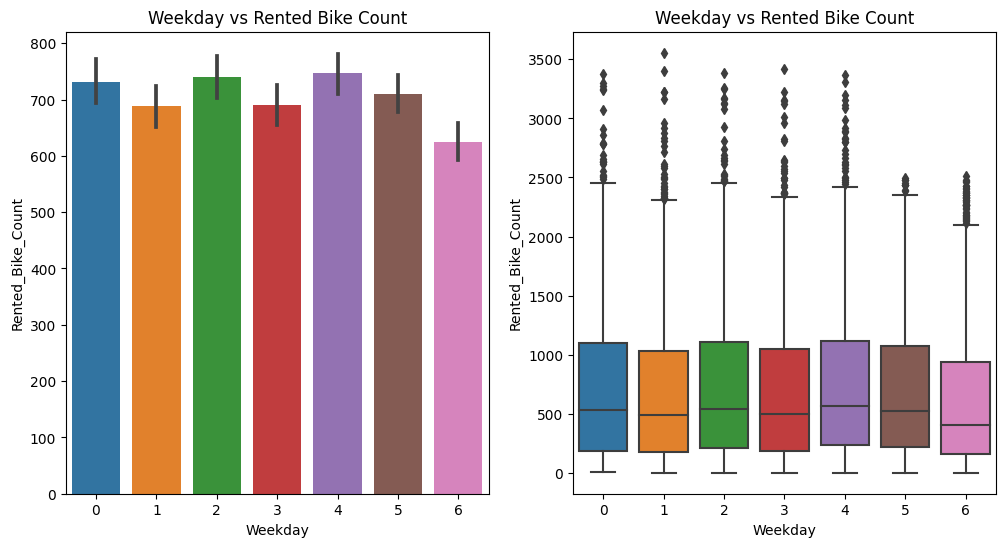

In [ ]:
categorical_plot('Weekday')

##### 1. Why did you pick the specific chart?

- This plot is pick to compare the rented bike count within a week.

##### 2. What is/are the insight(s) found from the chart?

- Weekend has lowest demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Business can utilise the low demand period to do the maintenance
work.

#### **Column: Hour**

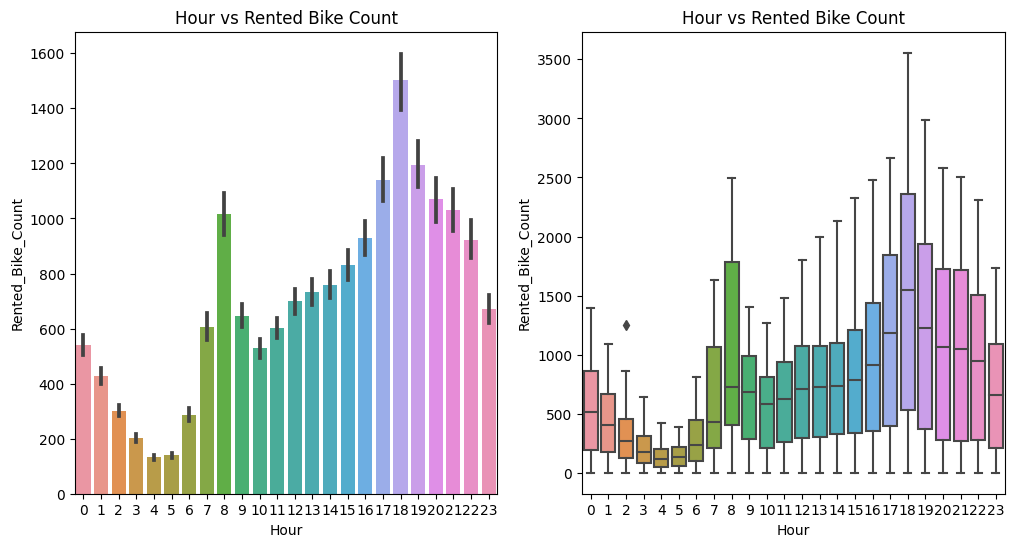

In [ ]:
categorical_plot('Hour')

##### 1. Why did you pick the specific chart?

- This plot is to compare the demand of rented bike throughout a day.

##### 2. What is/are the insight(s) found from the chart?

- Highest demand: At 6 PM.
- Lowest demand: At 4 AM

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Businesses must guarantee an adequate bike supply during peak hours of the day, and pricing can be flexibly adapted to match demand fluctuations throughout different time periods.

### **Numerical features Analysis**

---



1. Check skewness: Distribution plot, boxplot and Q-Q plot  of each numerical feature.
2. Check linear relationship: scatter plot wrt dependent var to check colinear relation.

#### **Skewness**

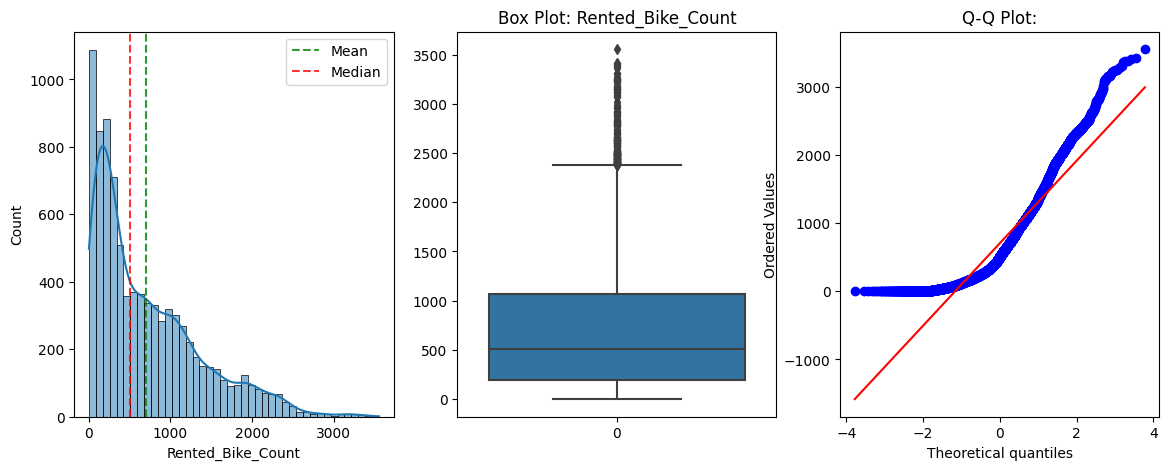

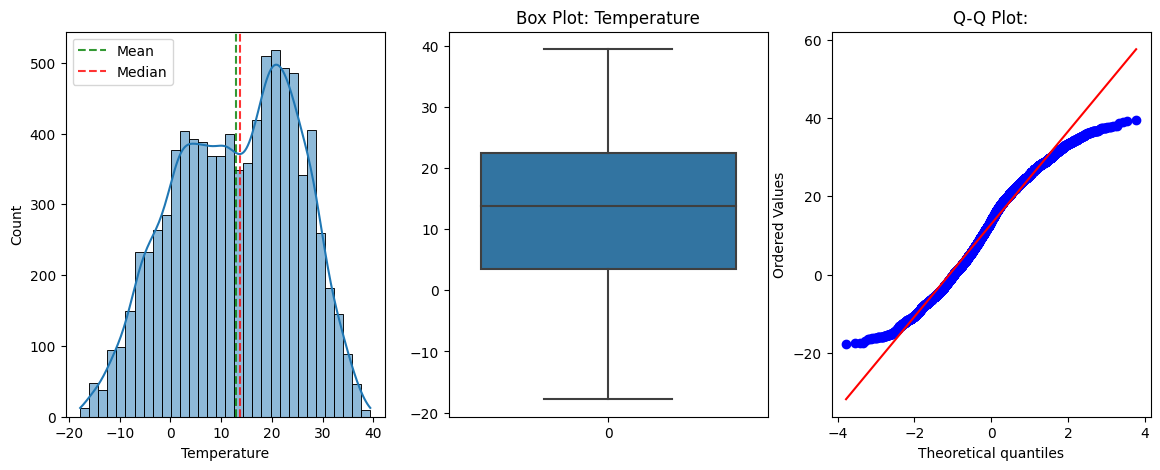

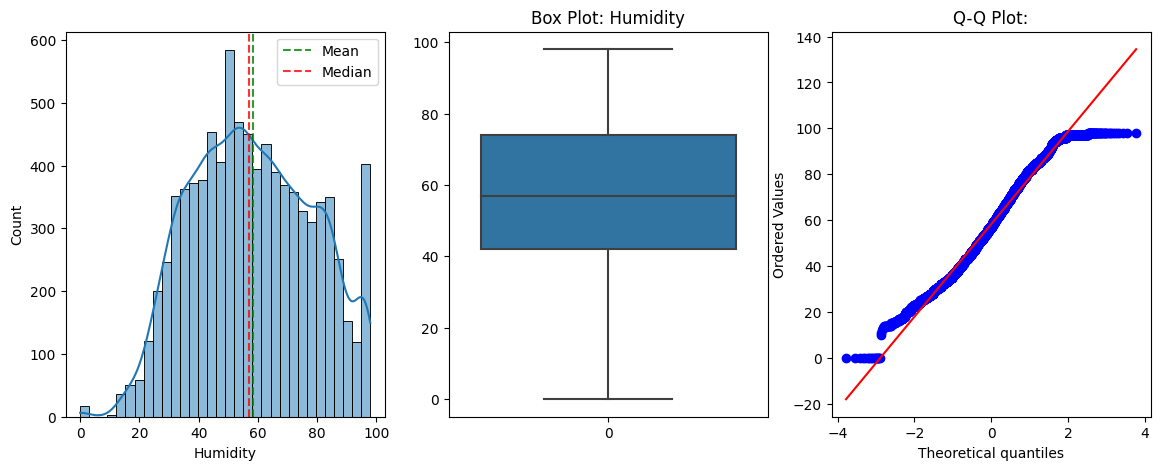

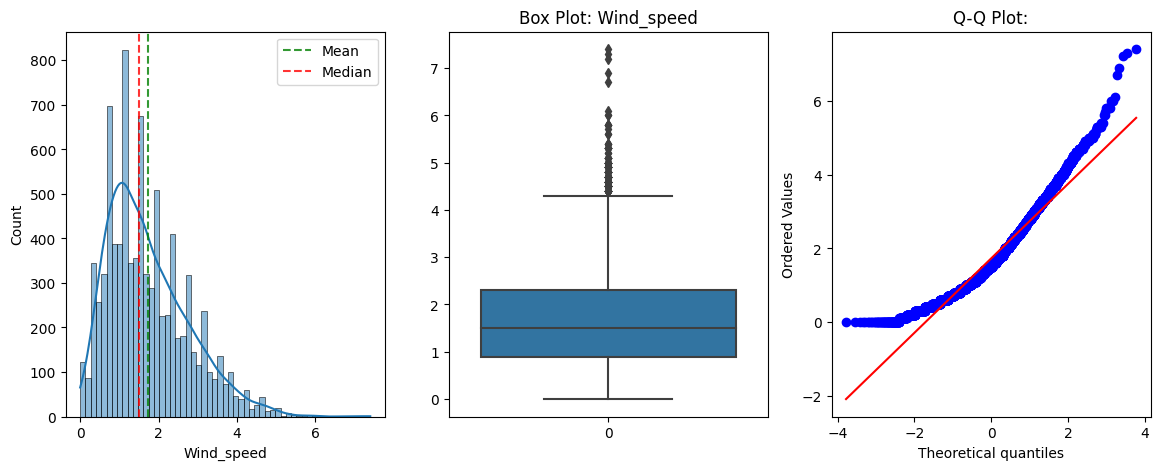

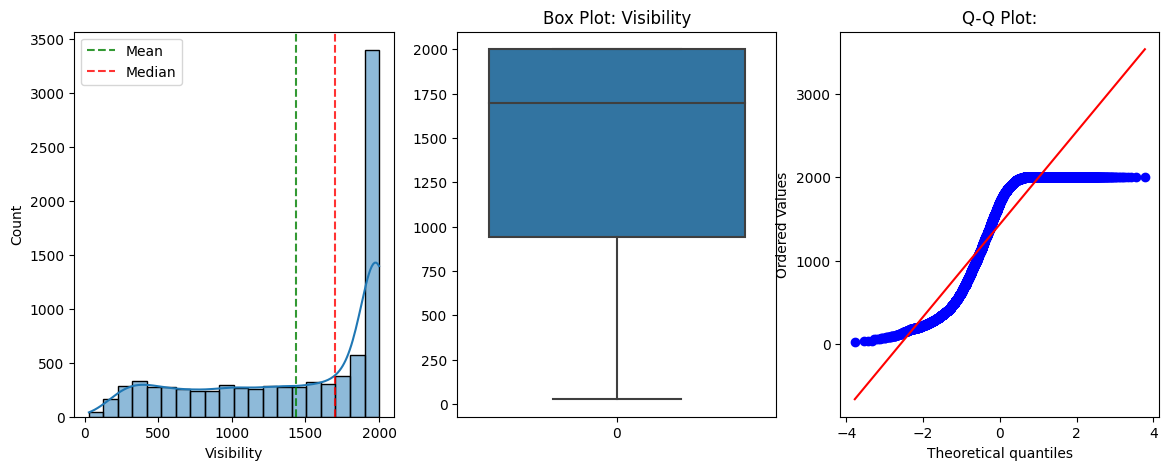

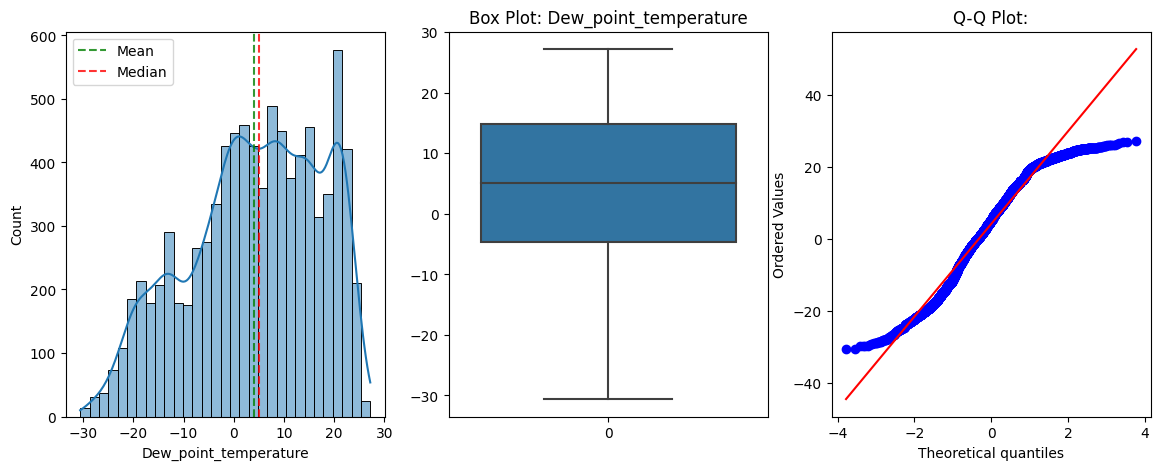

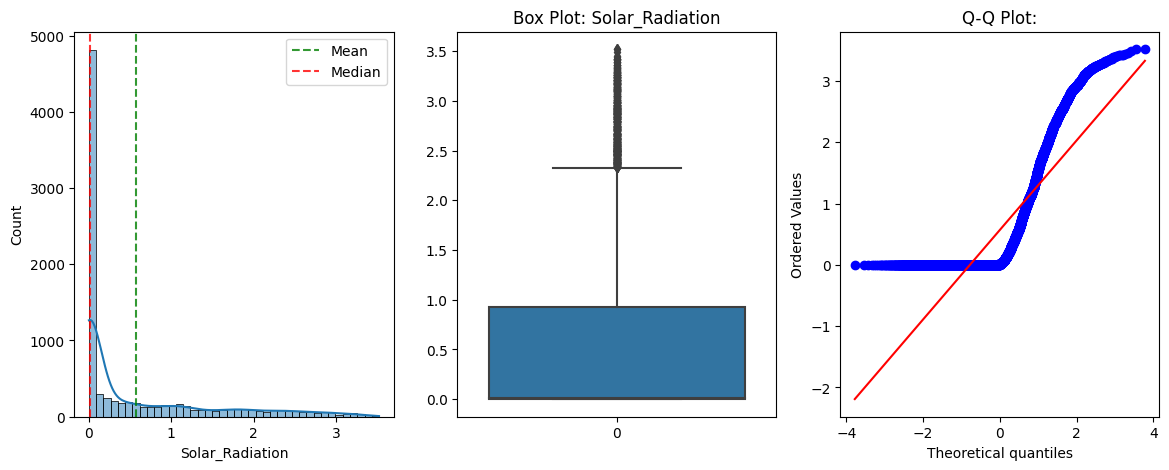

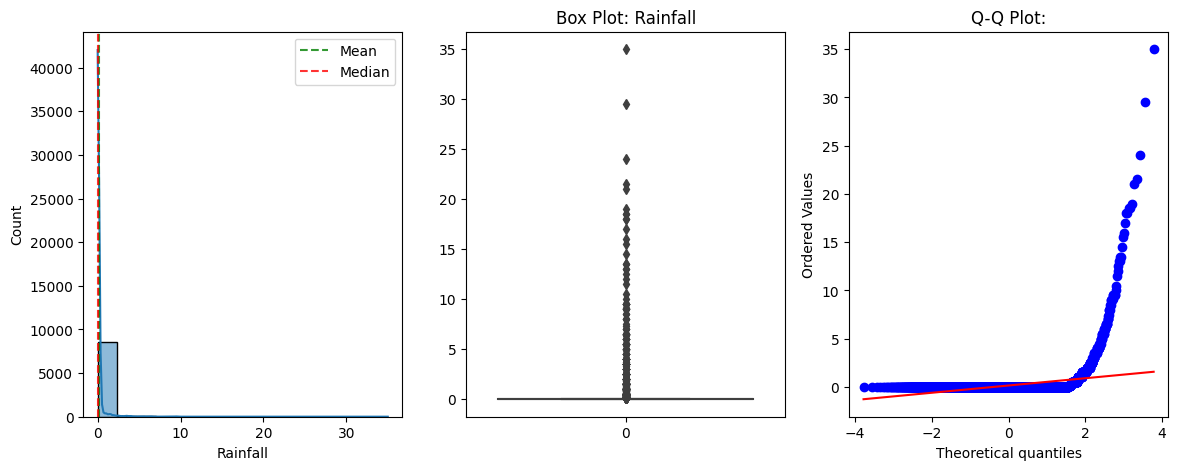

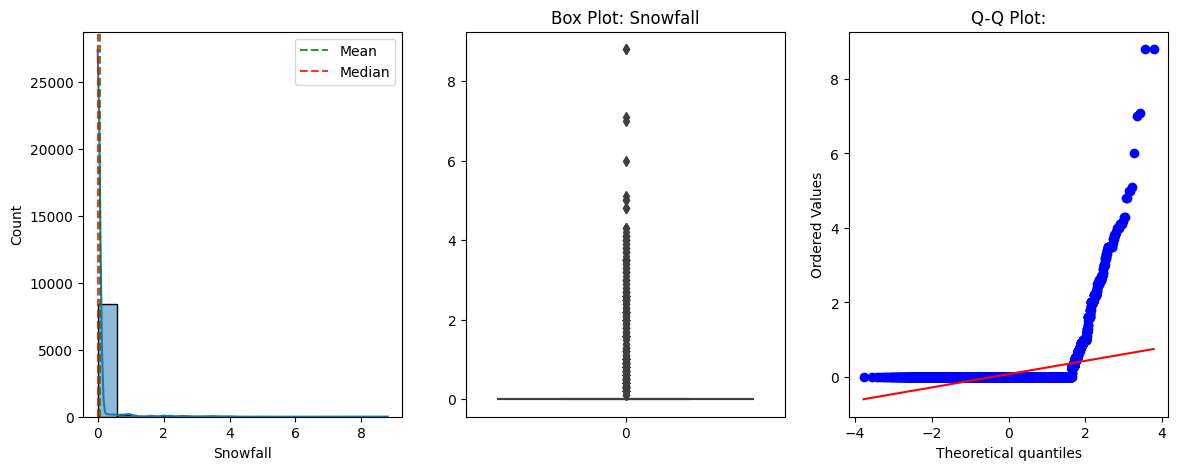

In [ ]:
# Chart - 1 visualization code
for feat in numerical_features:

    # Create a 2x2 grid of subplots
    fig, axs = plt.subplots(1, 3, figsize=(14, 5))

    # Subplot 1: Histogram
    sns.histplot(df[feat], kde = True, ax=axs[0])
    axs[0].axvline(df[feat].mean(), color ="green", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Mean')
    axs[0].axvline(df[feat].median(), color ="red", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Median')
    axs[0].legend()

    # Subplot 2: Boxplot
    sns.boxplot(df[feat], ax=axs[1])
    axs[1].set_title(f'Box Plot: {feat}')

    #Subplot 3: Q-Q plot
    stats.probplot(df[feat], plot = axs[2], dist="norm")
    axs[2].set_title('Q-Q Plot:')

    # Show the plot
    plt.show()

##### 1. Why did you pick the specific chart?

- These plots are picked to check which features follow normal distribution.
- QQ Plot: short for Quantile-Quantile plots, are graphical tools used for are often used to assess whether a dataset follows a normal distribution. When plotting the quantiles of the data against the quantiles of a normal distribution, a straight line indicates a good fit to a normal distribution, while deviations suggest departures from normality.

##### 2. What is/are the insight(s) found from the chart?

- **Normally Distributed**: Temperature and humidity.
- **Positively Skewed**: Rented bike count, Wind speed, Visibility, Solar radiation, Rainfall and Snowfall
- **Negatively Skewed**: Visibility.
- Snowfall and Rainfall both are highly skewed.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

- Skewed data requires transformation to improve the performance of ML models.

#### **Regression Plot**

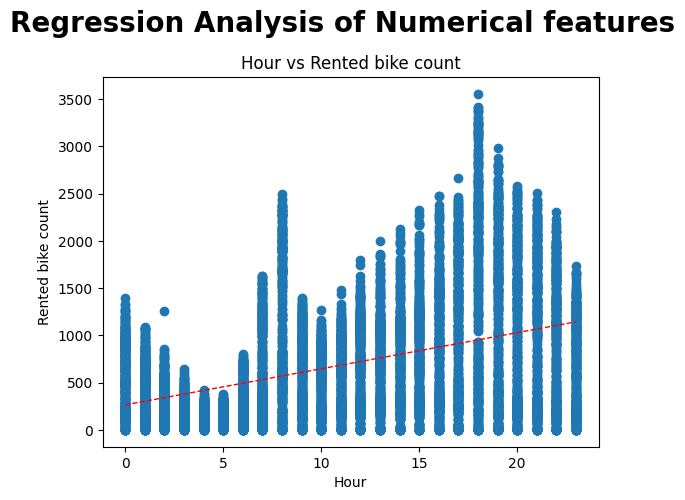

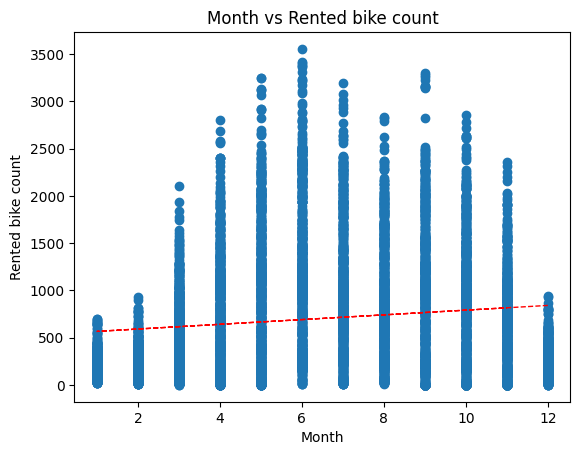

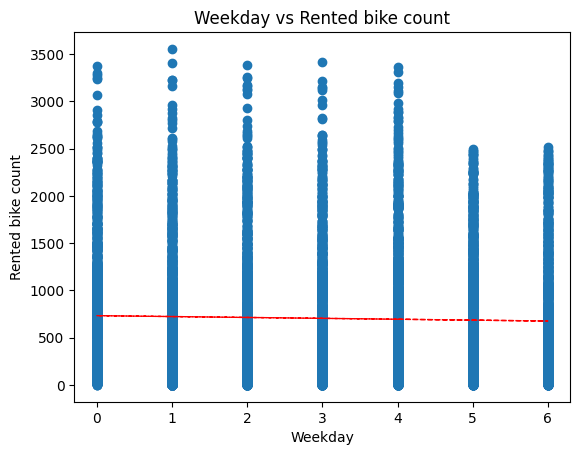

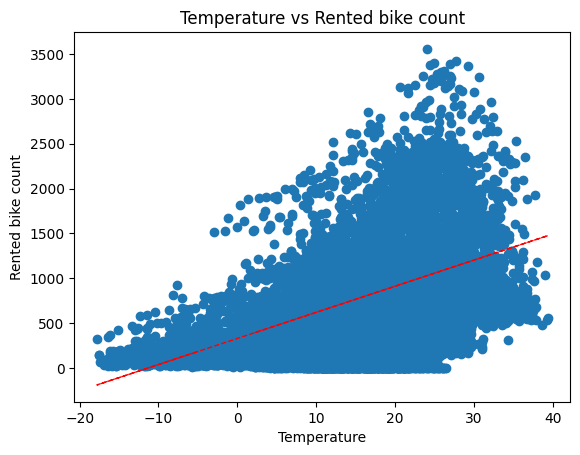

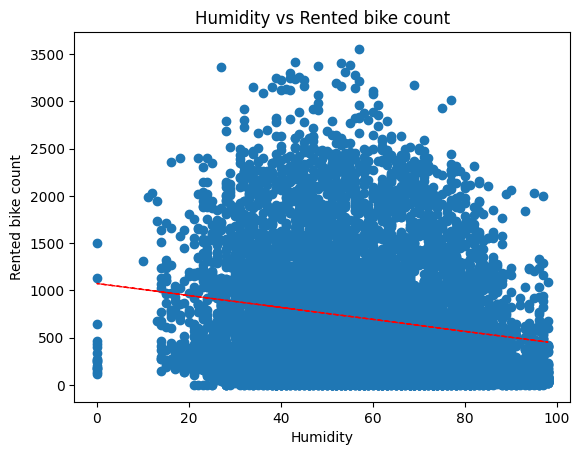

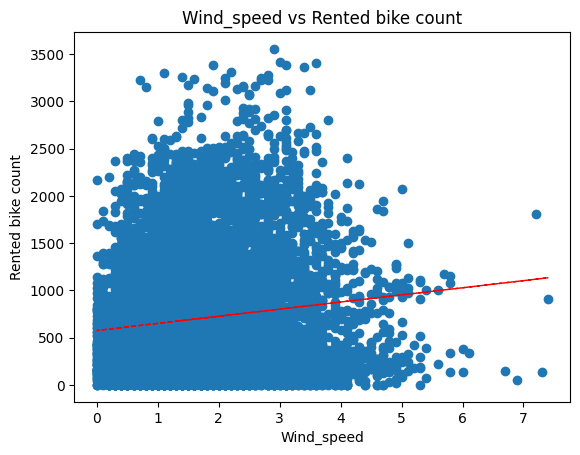

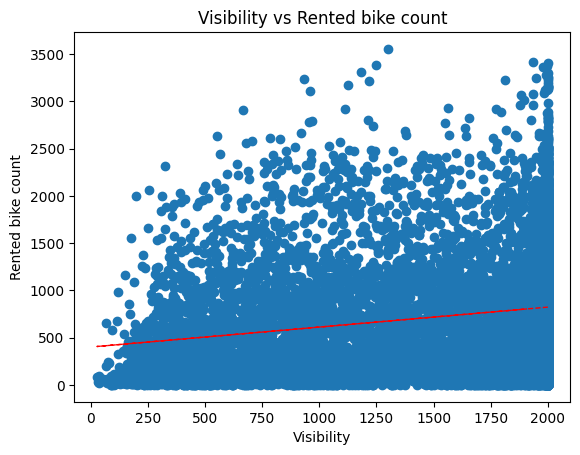

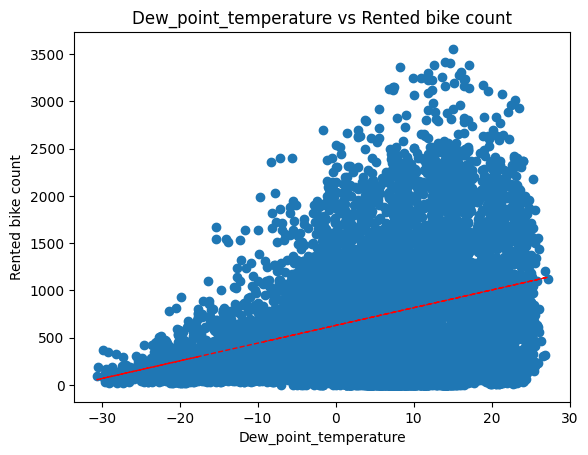

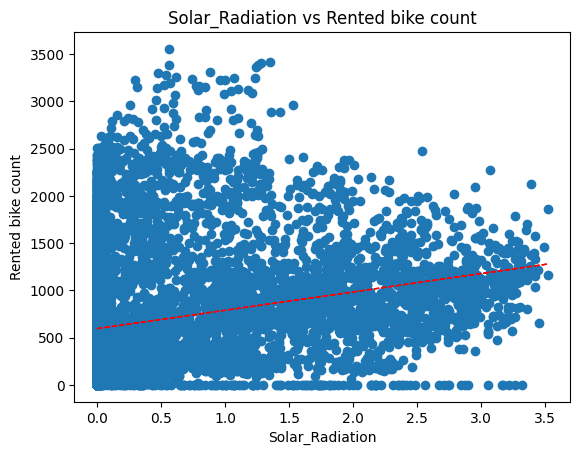

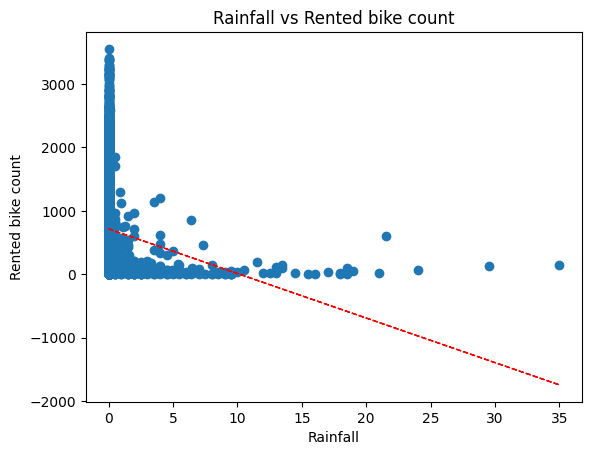

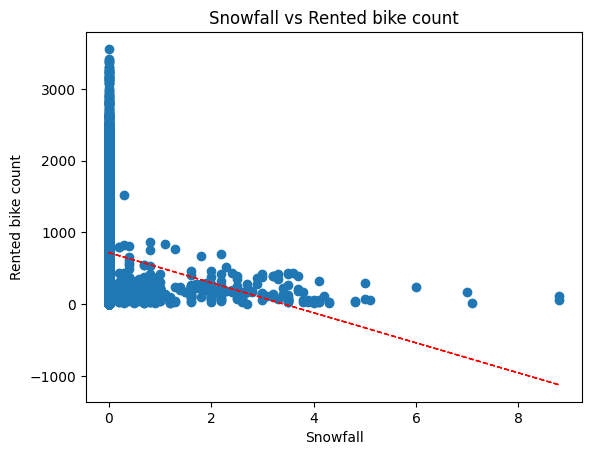

In [ ]:
# Lets check the linear relationship with dependent variable. , alpha=0.5
columns = ['Hour', 'Month', 'Weekday']
features = columns + numerical_features

plt.suptitle('Regression Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for feat in features:
  if feat != 'Rented_Bike_Count':
    # draw scatter plot
    plt.scatter(x = df[feat], y = df['Rented_Bike_Count'])
    plt.xlabel(feat)
    plt.ylabel('Rented bike count')

    # subplot : polyfit line
    z = np.polyfit(df[feat], df['Rented_Bike_Count'], 1)
    y_hat = np.poly1d(z)(df[feat])
    plt.plot(df[feat], y_hat, "r--", lw=1)

    # show plot
    plt.title(feat + ' vs ' + 'Rented bike count')
    plt.show()

##### 1. Why did you pick the specific chart?

- A regression plot used in statistics and data analysis to visualize the relationship between two or more variables.

##### 2. What is/are the insight(s) found from the chart?

- Most of the numerical features are positively correlated to our target variable.
- Humidity, Snowfall and Rainfall show negative correlation.

### **Correlation Heatmap**

<ipython-input-29-6c841a889961>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<Axes: >

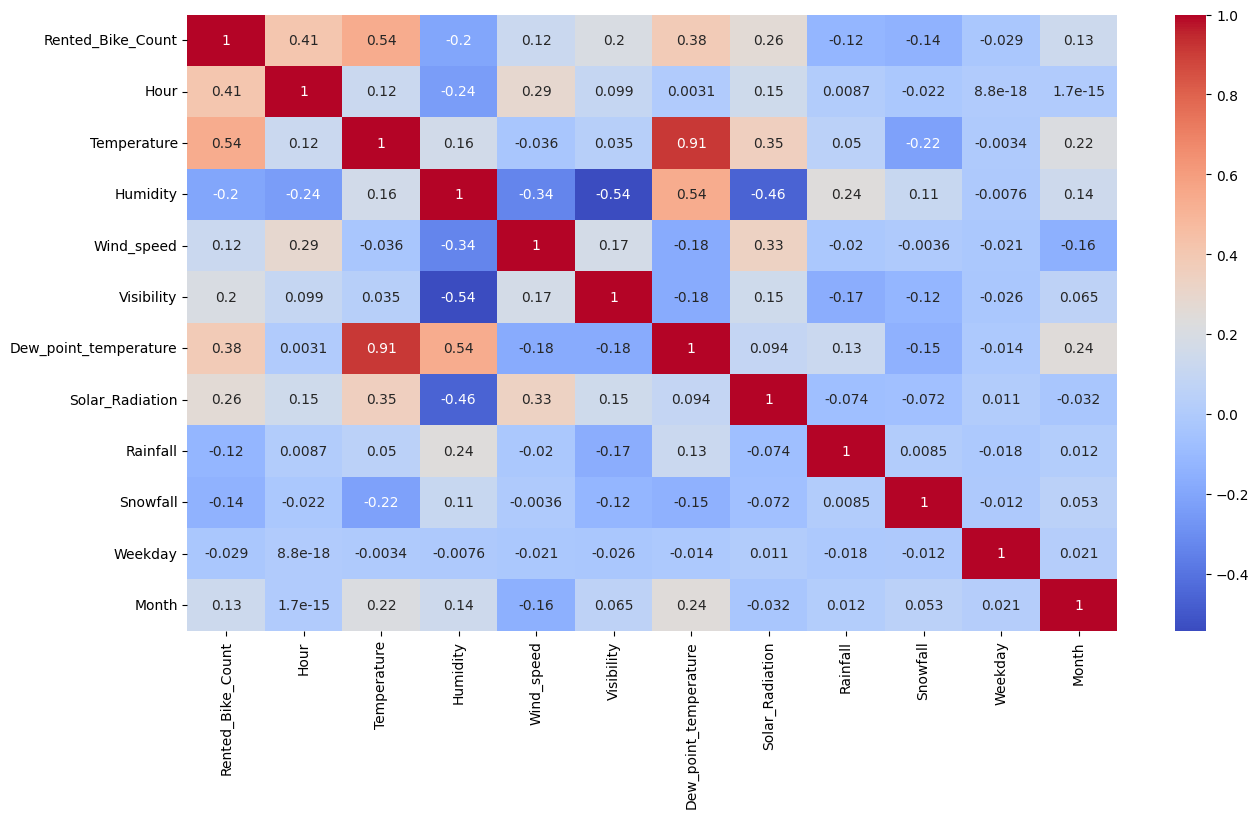

In [ ]:
# Correlation Heatmap visualization code
## Correlation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

- This plot is selected to determine the correlation between various features and the count of rented bikes, as well as to assess the correlations among the features themselves.

##### 2. What is/are the insight(s) found from the chart?

-  Rented bike count exhibits stronger correlations with the Hour and Temperature variables.
- Temperature is highly correlated with Dew point temperature.
- Weekday has no correlation with bike count so we can drop this column.


### **Pair Plot**

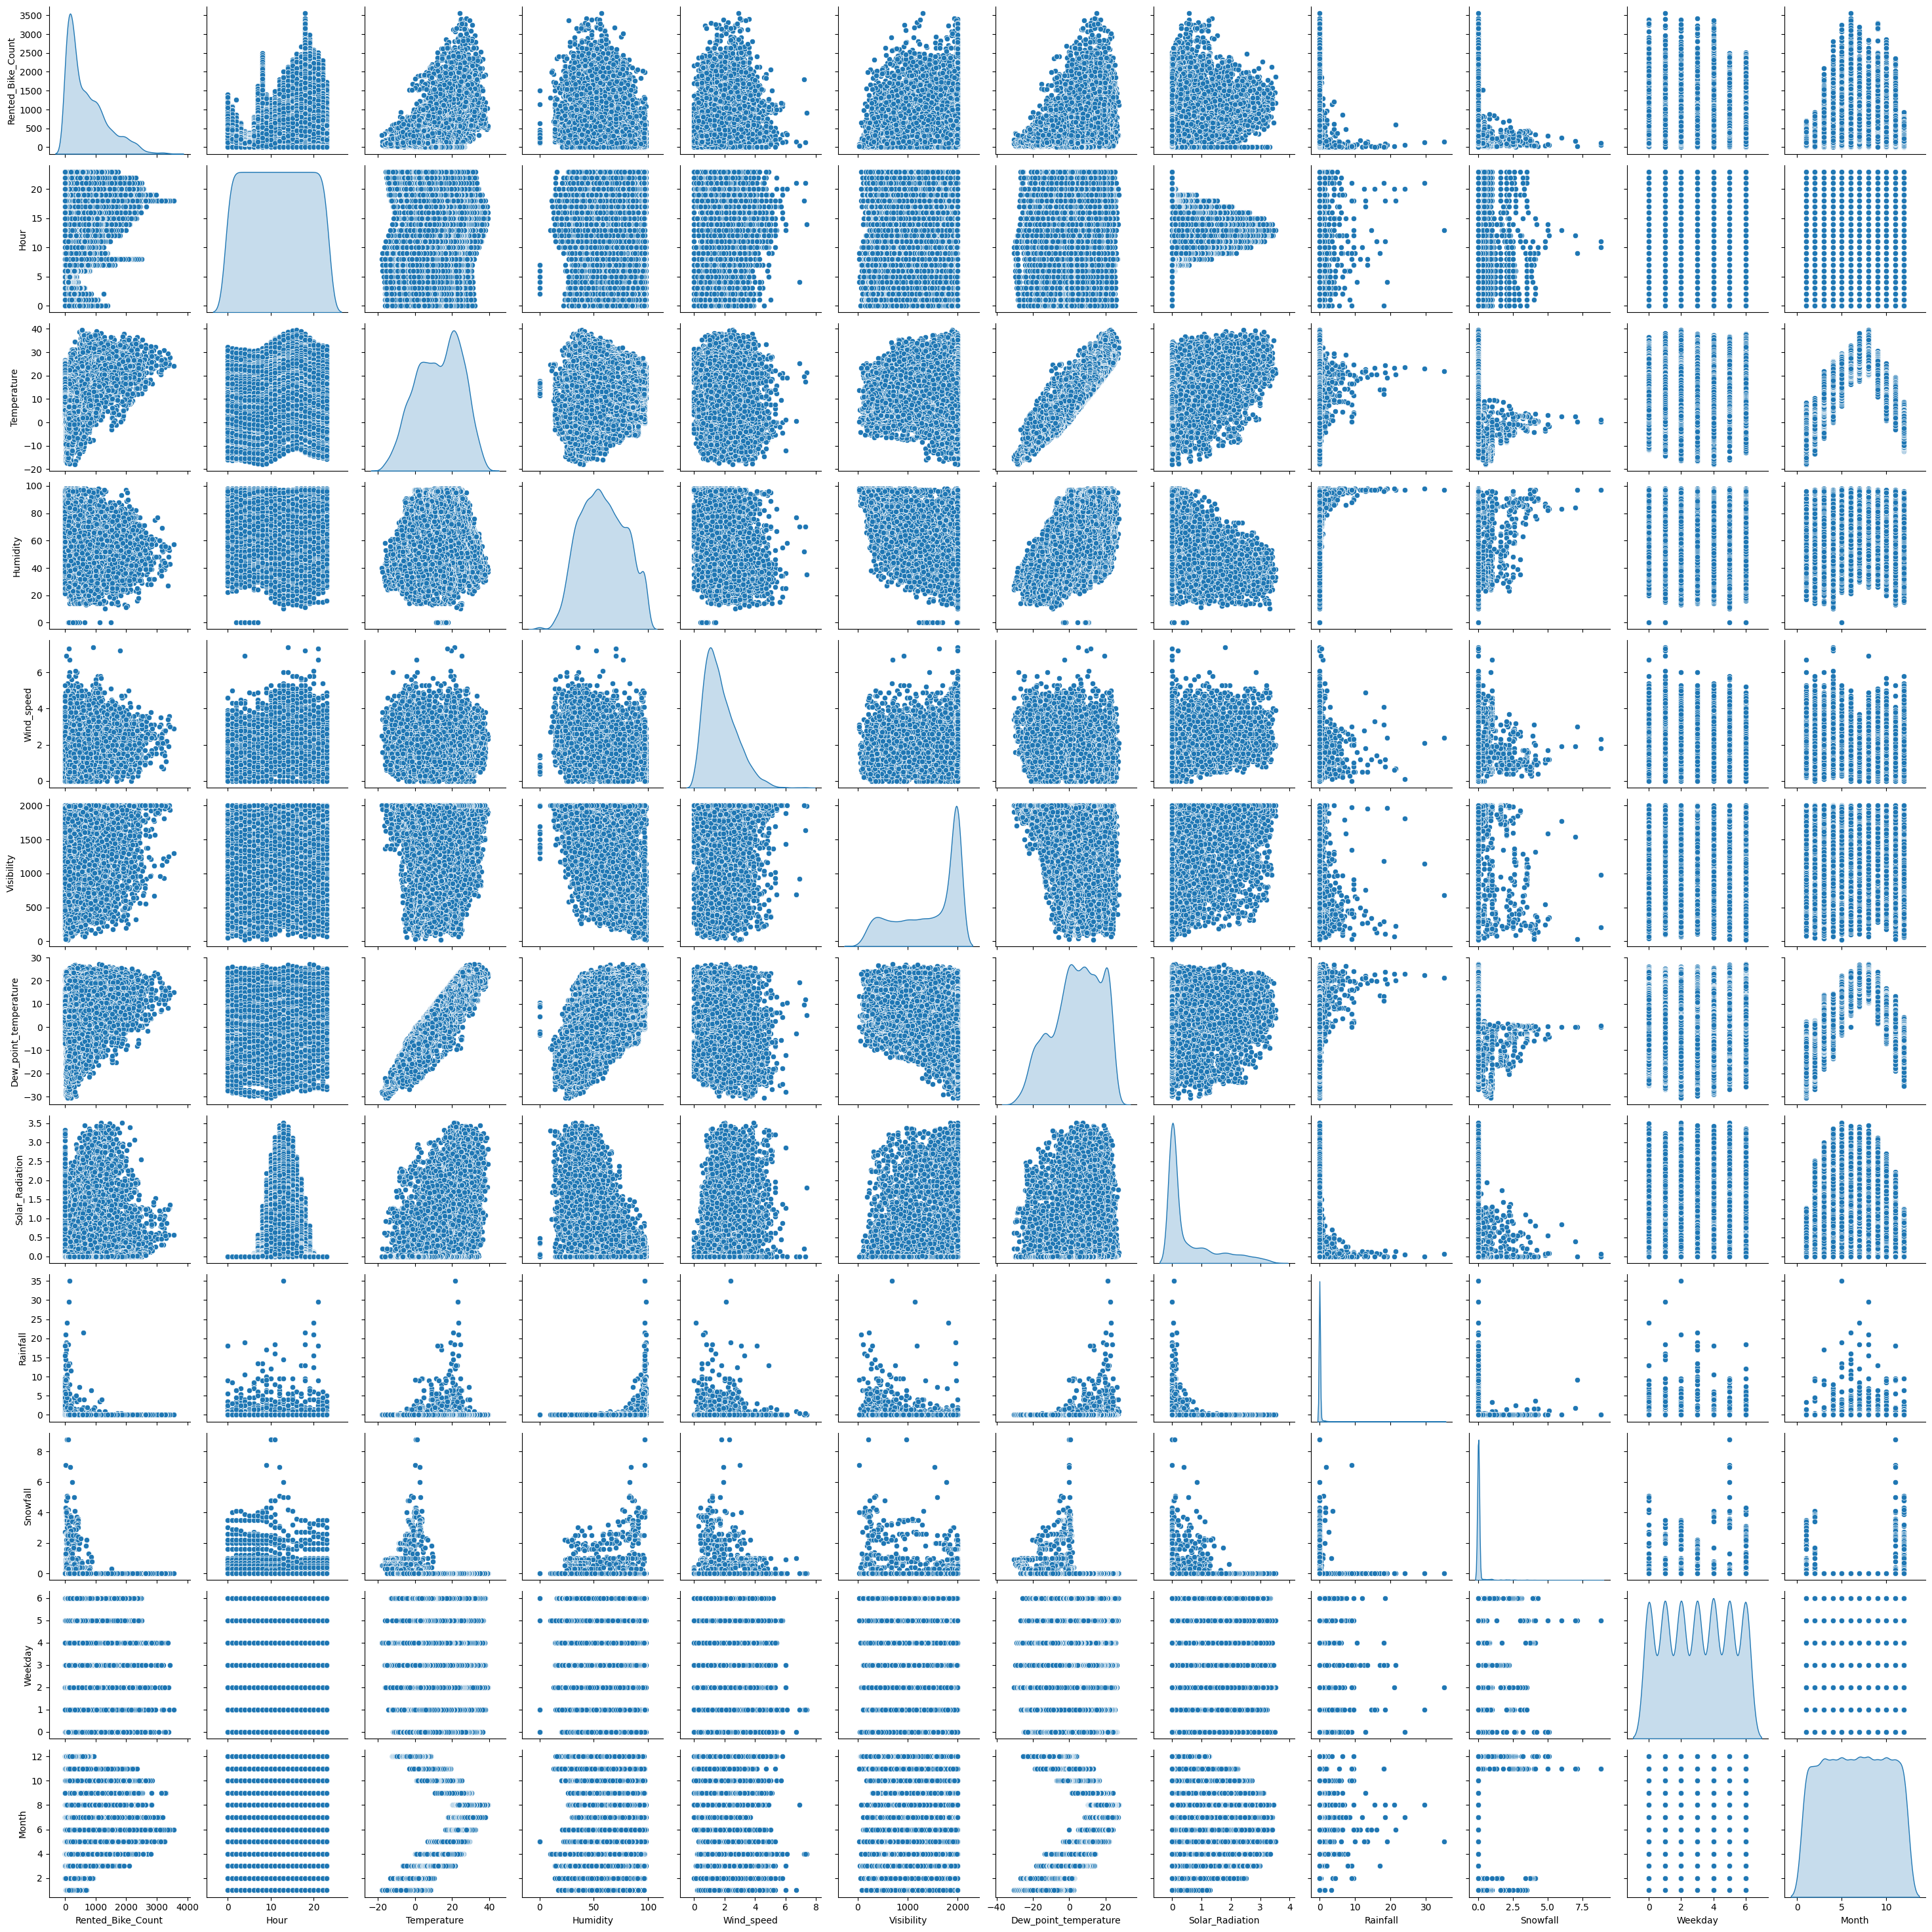

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, diag_kind='kde')

##### 1. Why did you pick the specific chart?

- Pair plot is picked to visually explore the relationships between multiple pairs of variables in a dataset.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Null Hypothesis (H0)**: There exists no notable association between the independent variables and the 'Rented Bike Count' (dependent variable).

**Alternative Hypothesis (Ha)**: A substantial connection exists between the independent variables and the 'Rented Bike Count' (dependent variable).

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm
df_copy = df.copy()

# Add a constant column to the DataFrame for the intercept term
df_copy = sm.add_constant(df_copy)

independent_vars = df_copy[df_copy.describe().columns].drop('Rented_Bike_Count',axis=1)
dependent_var = df_copy['Rented_Bike_Count']

# Perform the regression analysis
model = sm.OLS(dependent_var,independent_vars)
results = model.fit()

# Obtain the p-values
p_values = results.pvalues

print(round(p_values,5))

const                    0.00000
Hour                     0.00000
Temperature              0.00000
Humidity                 0.00000
Wind_speed               0.07470
Visibility               0.22448
Dew_point_temperature    0.32270
Solar_Radiation          0.00000
Rainfall                 0.00000
Snowfall                 0.25089
Weekday                  0.00016
Month                    0.00000
dtype: float64


In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     713.6
Date:                Mon, 18 Sep 2023   Prob (F-statistic):               0.00
Time:                        16:01:09   Log-Likelihood:                -66295.
No. Observations:                8760   AIC:                         1.326e+05
Df Residuals:                    8748   BIC:                         1.327e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   524.4976     99.987      5.246      0.000     328.499     720.496
Hour                     27.1777      0.787     34.520      0.000      25.634      28.721
Temperature              27.3427      3.926      6.965      0.000      19.647      35.038
Humidity                 -8.6987      1.113     -7.816      0.000     -10.880      -6.517
Wind_speed                9.8066      5.502      1.782      0.075      -0.978      20.591
Visibility                0.0127      0.010      1.215      0.224      -0.008       0.033
Dew_point_temperature     4.0918      4.137      0.989      0.323      -4.018      12.202
Solar_Radiation         -79.1036      8.194     -9.654      0.000     -95.165     -63.042
Rainfall                -59.0436      4.623    -12.772      0.000     -68.106     -49.982
Snowfall                 13.8526     12.064      1.148      0.251      -9.795      37.501
Weekday                  -9.5053      2.519     -3.774      0.000     -14.442      -4.568
Month                     7.8667      1.534      5.130      0.000       4.861      10.873
==============================================================================
Omnibus:                      918.554   Durbin-Watson:                   0.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1786.466
Skew:                           0.689   Prob(JB):                         0.00
Kurtosis:                       4.731   Cond. No.                     3.12e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### **Conclusion**

In [ ]:
df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Weekday',
       'Month'],
      dtype='object')

- The Visibility (p-value 0.22448), Dew_point_temperature (p-value 0.32270) and Snowfall (p-value 0.25089) which is higher than 0.05. This means we don't have enough evidence to say there's a strong relationship between Visibility, Dew Point Temperature, Snowfall and the 'Rented Bike Count.'

In summary, based on the provided p-values, we can dismiss the null hypothesis for the independent variables 'Hour', 'Temperature', 'Humidity', 'Wind_speed', 'Solar_Radiation', 'Rainfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'Weekday' and
       'Month'. This signifies that a meaningful relationship exists between these independent variables and the 'Rented Bike Count.' However, there is insufficient data to discard the null hypothesis for the 'Visibility', 'Dew_point_temperature' and 'Snowfall' variables, suggesting that these variables may not possess a significant connection with the 'Rented Bike Count.'







##### Which statistical test have you done to obtain P-Value?

To test this hypothesis, we can perform statistical tests such as:

**Feature Significance Test:** Analyze the p-values associated with the coefficients of the independent variables within the regression model. If these p-values fall below a predetermined significance threshold (e.g., 0.05), reject the null hypothesis and assert the presence of a meaningful relationship between the independent variables and the 'Rented Bike Count.'

**Overall Model Significance Test:** Evaluate the overall significance of the regression model through methods such as an F-test or chi-square test. If the resulting p-value is beneath the chosen significance level, reject the null hypothesis, and conclude that the model, as a whole, possesses significance in its ability to predict the 'Rented Bike Count.'

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis (H0):** The dependent variable is normally distributed in the population.

**Alternative hypothesis (Ha):** The dependent variable is not normally distributed in the population.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy import stats

# Perform the Shapiro-Wilk test
statistic, p_value = stats.shapiro(df_copy['Rented_Bike_Count'])

print("Shapiro-Wilk Test")
print("Test statistic:", statistic)
print("p-value:", p_value)


Shapiro-Wilk Test
Test statistic: 0.8822193145751953
p-value: 0.0


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


##### Which statistical test have you done to obtain P-Value?

Shapiro-Wilk test

##### **Conclusion**

Based on the Shapiro-Wilk test results, with a test statistic of 0.8822 and a p-value of 0.0, the p-value is less than the chosen significance level (e.g., 0.05). Therefore, we would reject the null hypothesis (H0) that the dependent variable is normally distributed.

## ***6. Feature Engineering & Data Pre-processing***

In [144]:
# function to check skewnewss of dataset. It will draw three plots - Histogram, Boxplot and QQ plot
def skew_plot(y):

    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    fig.subplots_adjust(hspace=0.4)

    # Subplot 1: Histogram
    sns.histplot(y, kde = True, ax=axs[0])
    axs[0].axvline(y.mean(), color ="green", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Mean')
    axs[0].axvline(y.median(), color ="red", alpha = 0.8, lw = 1.5, linestyle='dashed', label = 'Median')
    axs[0].legend()

    # Subplot 2: Boxplot
    sns.boxplot(y, ax=axs[1])
    axs[1].set_title('boxplot')

    #Subplot 3: Q-Q plot
    stats.probplot(y, plot = axs[2], dist="norm")
    axs[2].set_title('Q-Q Plot')

    # Show the plot
    plt.show()

### 1. Handling Missing Values

- No missing values




In [145]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
Weekday                  0
Month                    0
dtype: int64

### 2. Handling Outliers

There are few columns but we will only remove outliers from wind speed columns.

In [146]:
# Calculating upper whisker values of Outliers

def outlier_value(outlier_col):
    #Finding the inter-quartile range for the columns with outliers
    Q1 = df[outlier_col].quantile(0.25)
    Q3 = df[outlier_col].quantile(0.75)
    IQR = Q3-Q1
    IQR

    #Calculating the upper and lower whisker for outlier removal

    upper_whisker = Q3 + (1.5*IQR)
    lower_whisker = Q1 - (1.5*IQR)

    upper_outer_whisker = Q3 + (3*IQR)
    lower_outer_whisker = Q1 - (3*IQR)

    print('upper_whisker :\n', round(upper_whisker, 2),)
    print('upper_outer_whisker :\n', round(upper_outer_whisker, 2))

    return round(upper_whisker, 2), round(upper_outer_whisker, 2)

In [147]:
feature = 'Wind_speed'
upper_whisker, upper_outer_whisker = outlier_value(feature)

upper_whisker :
 4.4
upper_outer_whisker :
 6.5


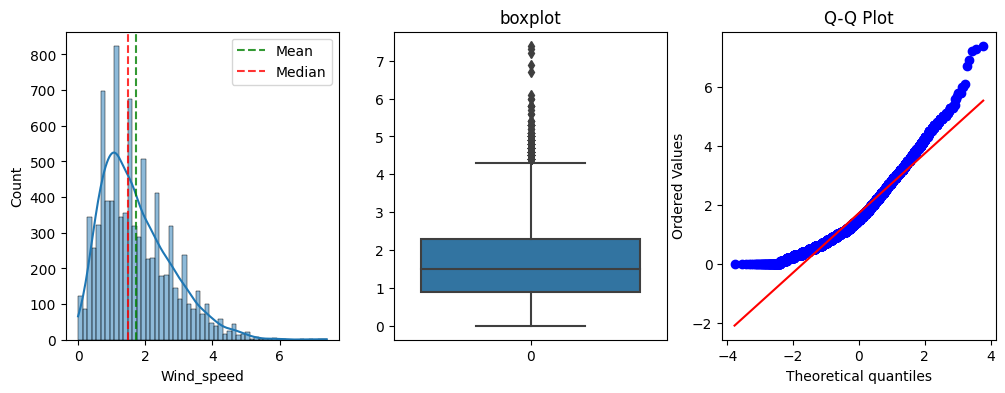

In [148]:
# Before removing outliers
skew_plot(df['Wind_speed'])

In [149]:
# replacing all the values more than whisker with upper_whisker value
df.loc[df[feature]>= upper_whisker, 'Wind_speed'] = upper_whisker

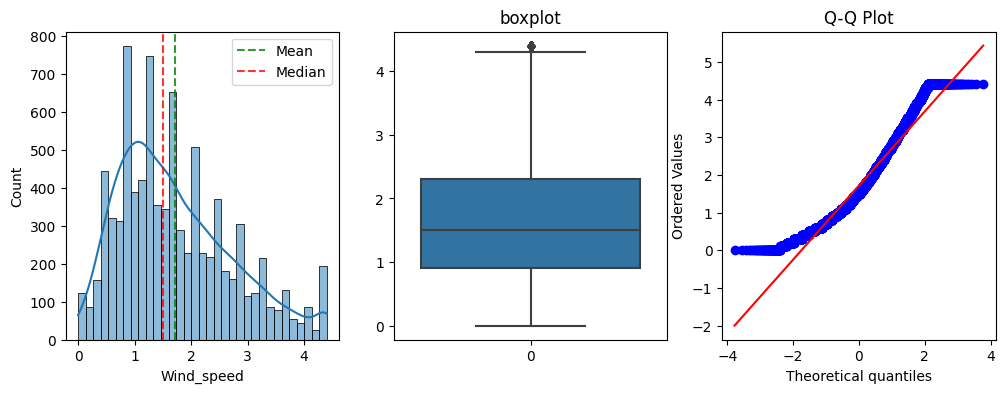

In [150]:
# After replacing outliers
skew_plot(df['Wind_speed'])

### 3. Categorical Encoding

There are few columns which are of categorical type and needs to do encoding.
1. Handle Functioning day
2. Handle Holiday
3. Handlie Seasons

##### 3.1 Encoding Columns Seasons

In [151]:
# onehot encoding of seasons
one_hot_encoded = pd.get_dummies(df['Seasons'])
df = pd.concat([df, one_hot_encoded], axis=1)

In [152]:
# drop the column season
df = df.drop('Seasons', axis = 1)

##### 3.2 Encoding Columns Functioning day

In [153]:
# Use map function to convert to numerical data type
conv_binary = {'Yes': 1, 'No': 0}
df['Functioning_Day'] = df['Functioning_Day'].map(conv_binary)

##### 3.3 Encoding Columns Holiday

In [154]:
# encoding holiday column
df['Holiday'].unique()
conv_binary = {'Holiday': 1, 'No Holiday': 0}
df['Holiday'] = df['Holiday'].map(conv_binary)

##### What all categorical encoding techniques have you used & why did you use those techniques?

- Seasons: Onehot encoding is used to convert categorical columns since considering all seasons as of equal importance.
- Functioning day: Replace 'Yes' with 1 and 'No' with 0.
- Holiday: Replace 'Holiday' with 1, 'No Holiday' with 0



### 4. Multicolinearity

In [155]:
df.head().T

0       1       2       3       4
Rented_Bike_Count       254.0   204.0   173.0   107.0    78.0
Hour                      0.0     1.0     2.0     3.0     4.0
Temperature              -5.2    -5.5    -6.0    -6.2    -6.0
Humidity                 37.0    38.0    39.0    40.0    36.0
Wind_speed                2.2     0.8     1.0     0.9     2.3
Visibility             2000.0  2000.0  2000.0  2000.0  2000.0
Dew_point_temperature   -17.6   -17.6   -17.7   -17.6   -18.6
Solar_Radiation           0.0     0.0     0.0     0.0     0.0
Rainfall                  0.0     0.0     0.0     0.0     0.0
Snowfall                  0.0     0.0     0.0     0.0     0.0
Holiday                   0.0     0.0     0.0     0.0     0.0
Functioning_Day           1.0     1.0     1.0     1.0     1.0
Weekday                   4.0     4.0     4.0     4.0     4.0
Month                    12.0    12.0    12.0    12.0    12.0
Autumn                    0.0     0.0     0.0     0.0     0.0
Spring                    0.0     0.0     0.0     0.0     0.0
Summer                    0.0     0.0     0.0     0.0     0.0
Winter                    1.0     1.0     1.0     1.0     1.0

In [156]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]

    return vif_data

if __name__ == "__main__":
    vif_result = calculate_vif(df)
    print(vif_result)

                 Variable         VIF
0       Rented_Bike_Count    2.232759
1                    Hour    1.405340
2             Temperature   90.316755
3                Humidity   20.927262
4              Wind_speed    1.318434
5              Visibility    1.691054
6   Dew_point_temperature  118.236288
7         Solar_Radiation    2.063342
8                Rainfall    1.109994
9                Snowfall    1.132078
10                Holiday    1.033233
11        Functioning_Day    1.233707
12                Weekday    1.016055
13                  Month    1.833665
14                 Autumn  111.248016
15                 Spring  110.906888
16                 Summer  115.070738
17                 Winter  106.596453


In [157]:
df = df.drop('Dew_point_temperature', axis = 1)

In [158]:
if __name__ == "__main__":
    vif_result = calculate_vif(df)
    print(vif_result)

             Variable        VIF
0   Rented_Bike_Count   2.231111
1                Hour   1.403030
2         Temperature   5.592031
3            Humidity   2.785876
4          Wind_speed   1.316189
5          Visibility   1.686057
6     Solar_Radiation   1.978041
7            Rainfall   1.096012
8            Snowfall   1.125422
9             Holiday   1.033177
10    Functioning_Day   1.232125
11            Weekday   1.009116
12              Month   1.833513
13             Autumn  28.453438
14             Spring  26.151792
15             Summer  34.322482
16             Winter  24.125219


### 5. Feature Manipulation & Selection


#### 5.1 Feature Selection

- We will remove the column Weekday as it is very less correlated to dependent variable.

In [ ]:
# Select your features wisely to avoid overfitting
df.drop('Weekday', axis = 1, inplace = True)
df.head().T

##### Which all features you found important and why?

- All other feature are important as they show correlation with dependent variable.

### 6. Data Transformation

**Transformation**

---
Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

In [58]:
# this function will apply all transformation technique on variable and draw plot for each one of them
def test_transformation(feat):
    # plot 1 Withoutransformation
    y = df[feat]
    skew_plot(y)

    # plot 2 with log transformation
    print('log transformation')
    y = np.log10(df[feat])
    skew_plot(y)

    # plot 3 with squareroot transformation
    print('Square root transformation')
    y = np.sqrt(df[feat])
    skew_plot(y)

    # plot 4 with inversent transformation
    print('Inverse transformation')
    y = 1/(df[feat])
    skew_plot(y)

##### **6.1 Rented bike count**

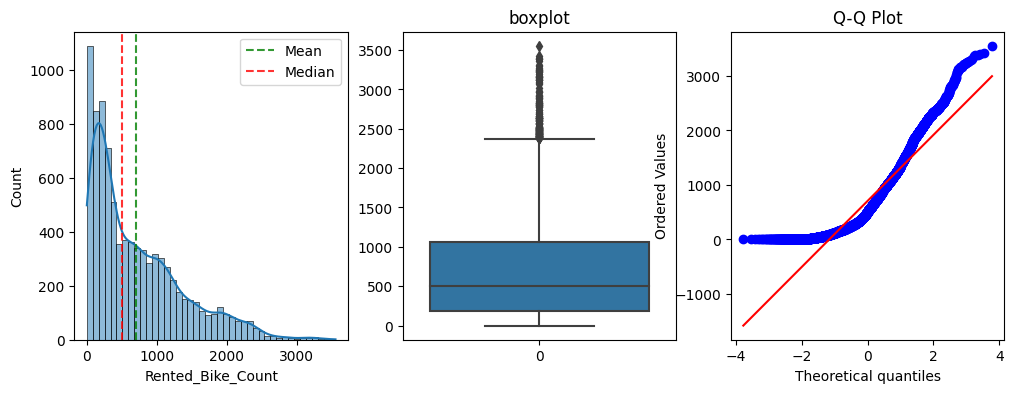

log transformation


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


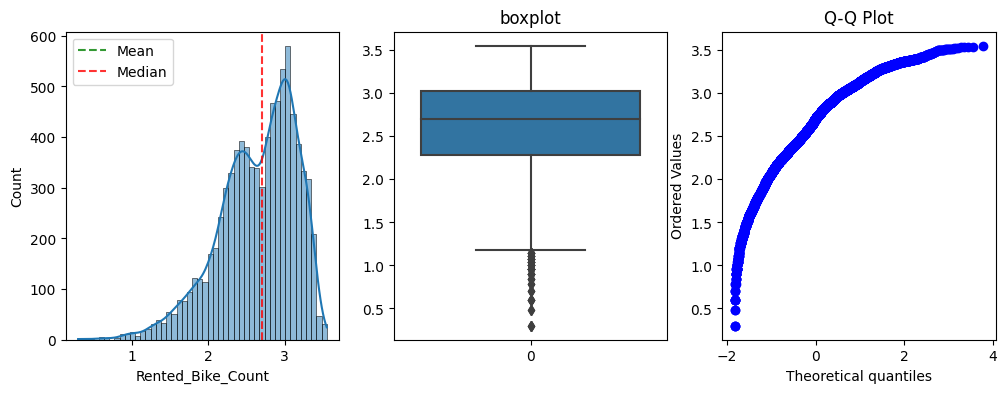

Square root transformation


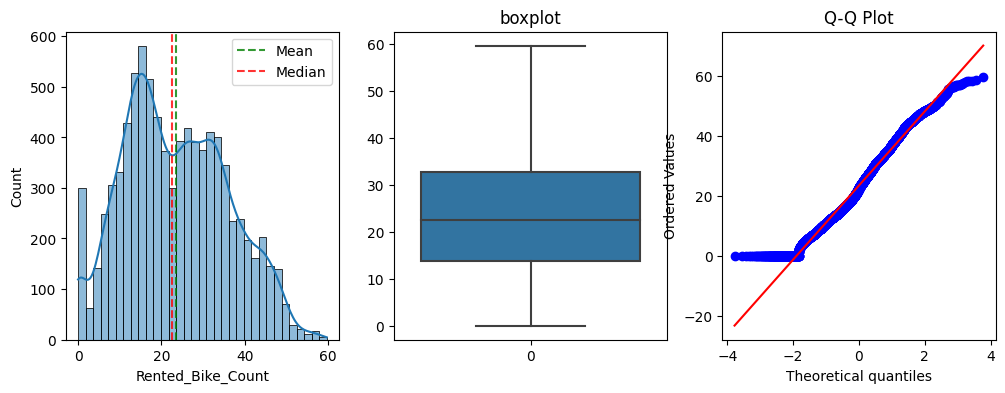

Inverse transformation


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2698: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


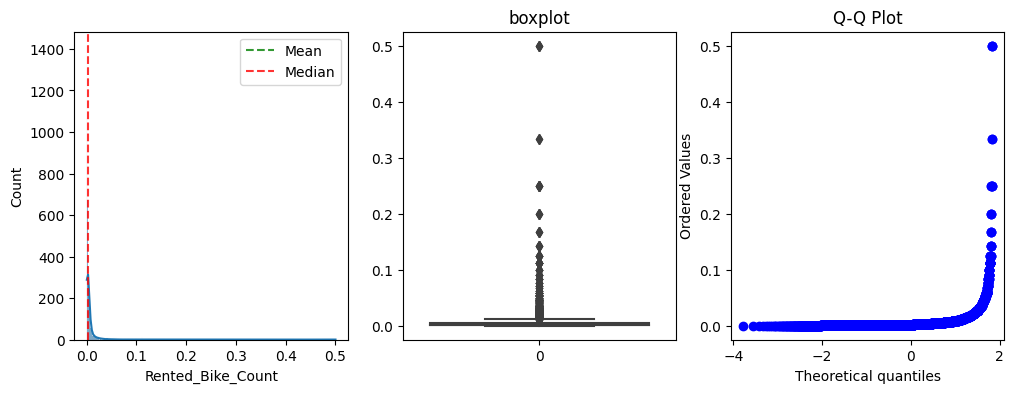

In [ ]:
feat = 'Rented_Bike_Count'
test_transformation(feat)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

- Rented_bike_count: Square root transformation.
- We have used square root transformation for the regression as it transformed the variable into a well-distributed form.

In [ ]:
# Transform Your data

### 7. Data Splitting

In [159]:
X = df.iloc[:, 1:]
y = np.sqrt(df['Rented_Bike_Count'])

In [160]:
# Split your data to train and test. Choose Splitting ratio wisely.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(7008, 16)
(1752, 16)


What data splitting ratio have you used and why?

- We have used 0.2 splitting ratio. That means 80% of the data is used for training and 20% of the data is used for testing the model.

### 8. Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scaling your data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Which method have you used to scale you data and why?

## ***7. ML Model Implementation***

##### Import all libraries

In [ ]:
# import all libraries related to ML
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

##### Evaluation metrics function

In [ ]:
# Visualizing evaluation Metric Score chart
def eval_metrics(model, X_train, y_train, X_test, y_test):

    # Predict on the model
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    print('train_score : ', train_score)
    print('test_score : ', test_score, '\n')

    # MSE
    MSE_train  = mean_squared_error(y_train, train_pred)
    MSE_test  = mean_squared_error(y_test, test_pred)
    print("MSE_train :" , MSE_train)
    print("MSE_test :" , MSE_test, '\n')

    #RMSE
    RMSE_train = np.sqrt(MSE_train)
    RMSE_test = np.sqrt(MSE_test)
    print("RMSE train :" ,RMSE_train)
    print("RMSE test :" ,RMSE_test, '\n')

    #r2_score
    r2_train = r2_score(y_train, train_pred)
    r2_test = r2_score(y_test, test_pred)
    print("R2 train :" ,r2_train)
    print("R2 test :" ,r2_test, '\n')

    #Adjusted R2
    # print("Adjusted R2 : ",1-(1-r2_score(10**(y_test), 10**(test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))



### **1. Linear regression**

In [ ]:
# ML Model - 1 Implementation
lr = LinearRegression()

# Fit the Algorithm
lr_model = lr.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
eval_metrics(lr_model, X_train, y_train, X_test, y_test)

train_score :  0.5545391118773229
test_score :  0.5574048389231776 

MSE_train : 185772.05880597423
MSE_test : 184056.25081363486 

RMSE train : 431.01282905033605
RMSE test : 429.0177744728473 

R2 train : 0.5545391118773229
R2 test : 0.5574048389231776 



In [ ]:
plt.figure(figsize=(25,5))
plt.plot(test_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **2. Polynomial regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features with degree=2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fit a linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
eval_metrics(model, X_train_poly, y_train, X_test_poly, y_test)

train_score :  0.720766434422361
test_score :  0.716276564325603 

MSE_train : 116449.71701938803
MSE_test : 117988.34788690529 

RMSE train : 341.24729598839025
RMSE test : 343.4943200213146 

R2 train : 0.720766434422361
R2 test : 0.716276564325603 



#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **2. Lasso**

In [ ]:
# lasso
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)

#fit the model
lasso_model = lasso.fit(X_train, y_train)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(lasso_model, X_train, y_train, X_test, y_test)

train_score :  0.5545391118768843
test_score :  0.5574048463496253 

MSE_train : 185772.05880615712
MSE_test : 184056.24772529537 

RMSE train : 431.01282905054825
RMSE test : 429.01777087353315 

R2 train : 0.5545391118768843
R2 test : 0.5574048463496253 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

In [ ]:
eval_metrics(lasso_regressor, X_train, y_train, X_test, y_test)

train_score :  0.5545385371317337
test_score :  0.5574098963650229 

MSE_train : 185772.29849406856
MSE_test : 184054.14764155657 

RMSE train : 431.0131071024042
RMSE test : 429.0153233178934 

R2 train : 0.5545385371317337
R2 test : 0.5574098963650229 



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

##### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **3. Ridge**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [ ]:
eval_metrics(ridge, X_train, y_train, X_test, y_test)

train_score :  0.5545390826516987
test_score :  0.5574046634810206 

MSE_train : 185772.07099403496
MSE_test : 184056.32377246604 

RMSE train : 431.0128431891966
RMSE test : 429.01785950291867 

R2 train : 0.5545390826516987
R2 test : 0.5574046634810206 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=3)

# Fit the Algorithm
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]})

In [ ]:
eval_metrics(ridge_regressor, X_train, y_train, X_test, y_test)

train_score :  0.5545277939052897
test_score :  0.5573896261587155 

MSE_train : 185776.77877807987
MSE_test : 184062.57714667605 

RMSE train : 431.0183044582676
RMSE test : 429.02514745254274 

R2 train : 0.5545277939052897
R2 test : 0.5573896261587155 



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **4. Elasticnet**

In [ ]:

#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(elasticnet, X_train, y_train, X_test, y_test)

train_score :  0.5523399829976483
test_score :  0.55497057136726 

MSE_train : 186689.16895065721
MSE_test : 185068.55776866205 

RMSE train : 432.07542044260884
RMSE test : 430.1959527571849 

R2 train : 0.5523399829976483
R2 test : 0.55497057136726 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()
param = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
         'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}

elastic_regressor = GridSearchCV(elastic, param, cv = 5)

# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.156e+08, tolerance: 2.334e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.106e+08, tolerance: 2.323e+05
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.202e+08, tolerance: 2.305e

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]})

In [ ]:
eval_metrics(elastic_regressor, X_train, y_train, X_test, y_test)

train_score :  0.5545334306832213
test_score :  0.5573977422760641 

MSE_train : 185774.42805353974
MSE_test : 184059.20200329061 

RMSE train : 431.0155775068225
RMSE test : 429.0212139315381 

R2 train : 0.5545334306832213
R2 test : 0.5573977422760641 



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **5. Decision tree regression**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(max_leaf_nodes=15, random_state = 20)
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=15, random_state=20)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(dtree, X_train, y_train, X_test, y_test)

train_score :  0.7170951914314716
test_score :  0.6952219556699222 

MSE_train : 117980.74788422722
MSE_test : 126744.05213383958 

RMSE train : 343.4832570653586
RMSE test : 356.0113089971154 

R2 train : 0.7170951914314716
R2 test : 0.6952219556699222 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
dtree = DecisionTreeRegressor()
params = {'max_leaf_nodes': [None, 10 , 20, 30],
          'max_depth': [None, 5, 7, 10, 20, 30],}

tree_regressor = GridSearchCV(dtree, params, cv = 5)

# Fit the Algorithm
tree_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 7, 10, 20, 30],
                         'max_leaf_nodes': [None, 10, 20, 30]})

In [ ]:
eval_metrics(tree_regressor, X_train, y_train, X_test, y_test)

train_score :  0.8817050952703375
test_score :  0.8026766774125119 

MSE_train : 49332.92368382736
MSE_test : 82058.26486033037 

RMSE train : 222.1101611449313
RMSE test : 286.45813805917675 

R2 train : 0.8817050952703375
R2 test : 0.8026766774125119 



In [ ]:
best_params = tree_regressor.best_params_
best_params

{'max_depth': 10, 'max_leaf_nodes': None}

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **6. Random forest**

In [ ]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor


# Create a Random Forest Regressor object with optional hyperparameters
rf_regressor = RandomForestRegressor(
    n_estimators=100,  # Number of trees in the forest
    max_depth=None,    # Maximum depth of the tree
    min_samples_split=2,  # Minimum number of samples required to split an internal node
    min_samples_leaf=1    # Minimum number of samples required to be at a leaf node
    # You can include other hyperparameters as needed
)

# Fit the Random Forest Regressor to the training data
rf_regressor.fit(X_train, y_train)


RandomForestRegressor()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(rf_regressor, X_train, y_train, X_test, y_test)

train_score :  0.9830337242497534
test_score :  0.8801149338108509 

MSE_train : 7075.503283074266
MSE_test : 49855.031757767545 

RMSE train : 84.1160108604436
RMSE test : 223.28240360083808 

R2 train : 0.9830337242497534
R2 test : 0.8801149338108509 



In [ ]:
# Access other information about the trained model, such as feature importances
feature_importances = rf_regressor.feature_importances_
print("Feature Importances:", feature_importances)


Feature Importances: [0.28509233 0.32242848 0.07394277 0.01872321 0.01783488 0.09513087
 0.0459918  0.00054385 0.0026813  0.08611256 0.01984474 0.01629403
 0.00246651 0.00170675 0.01120592]


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
rf_regressor = RandomForestRegressor(random_state=42)

# Define hyperparameters and their respective values to search
param_grid = {
    'n_estimators': [70, 100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Create a GridSearchCV object with the Random Forest Regressor and parameter grid
rf_grid = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to your data
rf_grid.fit(X, y)



GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [70, 100, 200, 300]})

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(rf_grid, X_train, y_train, X_test, y_test)

train_score :  -0.7594503287921646
test_score :  -0.7690503292617883 

MSE_train : 733749.513507355
MSE_test : 735671.7825661788 

RMSE train : 856.5918009806976
RMSE test : 857.7131120404881 

R2 train : -0.7594503287921646
R2 test : -0.7690503292617883 



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters: ", rf_grid.best_params_)
print("Best Score: ", rf_grid.best_score_)

# Access the best trained model
best_rf_model = rf_grid.best_estimator_


Best Hyperparameters:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 70}
Best Score:  0.10701973821699262


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### **7. XGBoost**

In [ ]:
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(
    n_estimators=100,      # Number of boosting rounds (trees)
    max_depth=3,           # Maximum depth of each tree
    learning_rate=0.1,     # Step size shrinkage to prevent overfitting
    objective='reg:squarederror'  # Regression objective function
    # You can include other hyperparameters as needed
)

# Fit the XGBoost Regressor to the training data
xgb_regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
eval_metrics(xgb_regressor, X_train, y_train, X_test, y_test)

train_score :  0.8602405771102853
test_score :  0.8405201548568 

MSE_train : 58284.344192765435
MSE_test : 66320.79371582091 

RMSE train : 241.4215073119324
RMSE test : 257.5282386765011 

R2 train : 0.8602405771102853
R2 test : 0.8405201548568 



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create an XGBoost Regressor object
xgb_regressor = xgb.XGBRegressor()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of boosting rounds (trees)
    'max_depth': [3, 4, 5],                   # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],       # Step size shrinkage to prevent overfitting
    'objective': ['reg:squarederror']         # Regression objective function
    # Add other hyperparameters and their ranges as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5],
                         'n_estimators': [100, 200, 300],
                         'objective': ['reg:squarederror']},
             scoring='neg_mean_squared_error')

In [ ]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a new XGBoost Regressor with the best hyperparameters
best_xgb_regressor = xgb.XGBRegressor(**best_params)

# Fit the best model to the training data
best_xgb_regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
eval_metrics(best_xgb_regressor, X_train, y_train, X_test, y_test)

train_score :  0.9497327019473092
test_score :  0.8772248016510255 

MSE_train : 20963.141094645805
MSE_test : 51056.9131529441 

RMSE train : 144.78653630308932
RMSE test : 225.95776851647324 

R2 train : 0.9497327019473092
R2 test : 0.8772248016510255 



##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***

#### **Analysing outlier**

In [ ]:
print(df[df['Snowfall'] > 0]['Snowfall'].count())
df[df['Snowfall'] > 0]

443


Rented_Bike_Count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
120                 145     0         -2.8        77         0.0         331   
121                 144     1         -3.0        79         0.0         293   
122                 117     2         -3.0        79         0.0        1862   
123                  78     3         -3.2        78         0.0        1808   
124                  58     4         -3.4        75         0.0        1982   
...                 ...   ...          ...       ...         ...         ...   
8645                115     5          2.1        88         1.4         323   
8646                339     6          1.8        88         1.1         313   
8647                819     7          1.7        89         1.3         295   
8648               1524     8          2.0        84         1.1         396   
8649                795     9          3.1        77         0.9         457   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
120                    -6.2             0.00       0.1       0.1  Winter   
121                    -6.1             0.00       0.0       0.3  Winter   
122                    -6.1             0.00       0.0       0.4  Winter   
123                    -6.4             0.00       0.2       0.4  Winter   
124                    -7.2             0.00       0.0       0.4  Winter   
...                     ...              ...       ...       ...     ...   
8645                    0.3             0.00       0.0       0.3  Autumn   
8646                    0.0             0.00       0.0       0.3  Autumn   
8647                    0.0             0.00       0.0       0.3  Autumn   
8648                   -0.4             0.03       0.0       0.3  Autumn   
8649                   -0.5             0.40       0.0       0.2  Autumn   

         Holiday Functioning_Day  Weekday  Month  
120   No Holiday             Yes        2     12  
121   No Holiday             Yes        2     12  
122   No Holiday             Yes        2     12  
123   No Holiday             Yes        2     12  
124   No Holiday             Yes        2     12  
...          ...             ...      ...    ...  
8645  No Holiday             Yes        0     11  
8646  No Holiday             Yes        0     11  
8647  No Holiday             Yes        0     11  
8648  No Holiday             Yes        0     11  
8649  No Holiday             Yes        0     11  

[443 rows x 15 columns]

In [ ]:
df_snowfall = df[df['Snowfall'] > 0]

In [ ]:
for i in categorical_features:
  if i == 'Hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df_snowfall, x='Hour', y='Rented_Bike_Count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show

NameError: ignored

In [ ]:
df_rainfall = df[df['Rainfall'] > 0]

In [ ]:
for i in categorical_features:
  if i == 'Hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(10,5))
    sns.pointplot(data=df_rainfall, x='Hour', y='Rented_Bike_Count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show

In [ ]:
#  'Snowfall (cm)'
print(df[df['Rainfall'] > 0]['Rainfall'].count())
df[df['Rainfall'] > 0]

In [ ]:
print(df[df['Wind_speed'] > 4.4]['Wind_speed'].count())
df[df['Wind_speed'] > 4.4]

In [ ]:
df = df.drop(df[df['Snowfall'] > 4].index, axis=0)
df = df.drop(df[df['Rainfall'] > 10].index, axis=0)
df = df.drop(df[df['Wind_speed'] > 5].index, axis=0)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.